# P02_02_EDA

In [1]:
section_fig_main_title  = 'P02_02_EDA_'

In [2]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [3]:
import sys
# print(sys.executable)

In [4]:
import statsmodels.api as sm

In [5]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install matplotlib

In [6]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
%config InlineBackend.figure_format = 'retina'


### Read data

In [51]:
csv_path = "../Data/jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path, index_col=0, parse_dates=True)

let's get an intuition of feathers in data by printing the data first 5 rows.

In [52]:
df.head()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
2009-01-01 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
2009-01-01 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2009-01-01 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
2009-01-01 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
2009-01-01 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2009-01-01 00:10:00          3.33          3.11          0.22       1.94   
2009-01-01 00:20:00          3.23          3.02          0.21       1.89   
2009-01-01 00:30:00          3.21          3.01          0.20       1.88   
2009-01-01 00:40:00          3.26          3.07          0.19       1.92   
2009-01-01 00:50:00          3.27          3.08          0.19       1.92   

                     H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
Date Time                                                                     
2009-01-01 00:10:00             3.12       1307.75      1.03           1.75   
2009-01-01 00:20:00             3.03       1309.80      0.72           1.50   
2009-01-01 00:30:00             3.02       1310.24      0.19           0.63   
2009-01-01 00:40:00             3.08       1309.19      0.34           0.50   
2009-01-01 00:50:00             3.09       1309.00      0.32           0.63   

                     wd (deg)  
Date Time                      
2009-01-01 00:10:00     152.3  
2009-01-01 00:20:00     136.1  
2009-01-01 00:30:00     171.6  
2009-01-01 00:40:00     198.0  
2009-01-01 00:50:00     214.3

In [56]:
df.tail()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
2016-12-31 23:20:00   1000.07     -4.05    269.10        -8.13   73.10   
2016-12-31 23:30:00    999.93     -3.35    269.81        -8.06   69.71   
2016-12-31 23:40:00    999.82     -3.16    270.01        -8.21   67.91   
2016-12-31 23:50:00    999.81     -4.23    268.94        -8.53   71.80   
2017-01-01 00:00:00    999.82     -4.82    268.36        -8.42   75.70   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2016-12-31 23:20:00          4.52          3.30          1.22       2.06   
2016-12-31 23:30:00          4.77          3.32          1.44       2.07   
2016-12-31 23:40:00          4.84          3.28          1.55       2.05   
2016-12-31 23:50:00          4.46          3.20          1.26       1.99   
2017-01-01 00:00:00          4.27          3.23          1.04       2.01   

                     H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
Date Time                                                                     
2016-12-31 23:20:00             3.30       1292.98      0.67           1.52   
2016-12-31 23:30:00             3.32       1289.44      1.14           1.92   
2016-12-31 23:40:00             3.28       1288.39      1.08           2.00   
2016-12-31 23:50:00             3.20       1293.56      1.49           2.16   
2017-01-01 00:00:00             3.23       1296.38      1.23           1.96   

                     wd (deg)  
Date Time                      
2016-12-31 23:20:00     240.0  
2016-12-31 23:30:00     234.3  
2016-12-31 23:40:00     215.2  
2016-12-31 23:50:00     225.8  
2017-01-01 00:00:00     184.9

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1 MB


In [26]:
# df['Date Time'] = pd.to_datetime(df['Date Time'])

In [27]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420551 non-null  datetime64[ns]
 1   p (mbar)         420551 non-null  float64       
 2   T (degC)         420551 non-null  float64       
 3   Tpot (K)         420551 non-null  float64       
 4   Tdew (degC)      420551 non-null  float64       
 5   rh (%)           420551 non-null  float64       
 6   VPmax (mbar)     420551 non-null  float64       
 7   VPact (mbar)     420551 non-null  float64       
 8   VPdef (mbar)     420551 non-null  float64       
 9   sh (g/kg)        420551 non-null  float64       
 10  H2OC (mmol/mol)  420551 non-null  float64       
 11  rho (g/m**3)     420551 non-null  float64       
 12  wv (m/s)         420551 non-null  float64       
 13  max. wv (m/s)    420551 non-null  float64       
 14  wd (deg)         420

In [54]:
df.shape

(420551, 14)

In [55]:
df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

Comparing the time series with a past (shift the df)

In [84]:
df_shifted = df.shift(periods=3)
df_shifted = df_shifted[3:]
df_shifted

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
2009-01-01 00:40:00    996.52     -8.02    265.40        -8.90   93.30   
2009-01-01 00:50:00    996.57     -8.41    265.01        -9.28   93.40   
2009-01-01 01:00:00    996.53     -8.51    264.91        -9.31   93.90   
2009-01-01 01:10:00    996.51     -8.31    265.12        -9.07   94.20   
2009-01-01 01:20:00    996.51     -8.27    265.15        -9.04   94.10   
...                       ...       ...       ...          ...     ...   
2016-12-31 23:20:00   1000.32     -4.09    269.05        -7.23   78.60   
2016-12-31 23:30:00   1000.21     -3.76    269.39        -7.95   72.50   
2016-12-31 23:40:00   1000.11     -3.93    269.23        -8.09   72.60   
2016-12-31 23:50:00   1000.07     -4.05    269.10        -8.13   73.10   
2017-01-01 00:00:00    999.93     -3.35    269.81        -8.06   69.71   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2009-01-01 00:40:00          3.33          3.11          0.22       1.94   
2009-01-01 00:50:00          3.23          3.02          0.21       1.89   
2009-01-01 01:00:00          3.21          3.01          0.20       1.88   
2009-01-01 01:10:00          3.26          3.07          0.19       1.92   
2009-01-01 01:20:00          3.27          3.08          0.19       1.92   
...                           ...           ...           ...        ...   
2016-12-31 23:20:00          4.51          3.54          0.96       2.21   
2016-12-31 23:30:00          4.62          3.35          1.27       2.09   
2016-12-31 23:40:00          4.56          3.31          1.25       2.06   
2016-12-31 23:50:00          4.52          3.30          1.22       2.06   
2017-01-01 00:00:00          4.77          3.32          1.44       2.07   

                     H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  \
Date Time                                                                     
2009-01-01 00:40:00             3.12       1307.75      1.03           1.75   
2009-01-01 00:50:00             3.03       1309.80      0.72           1.50   
2009-01-01 01:00:00             3.02       1310.24      0.19           0.63   
2009-01-01 01:10:00             3.08       1309.19      0.34           0.50   
2009-01-01 01:20:00             3.09       1309.00      0.32           0.63   
...                              ...           ...       ...            ...   
2016-12-31 23:20:00             3.54       1293.37      1.25           1.60   
2016-12-31 23:30:00             3.35       1291.71      0.89           1.30   
2016-12-31 23:40:00             3.31       1292.41      0.56           1.00   
2016-12-31 23:50:00             3.30       1292.98      0.67           1.52   
2017-01-01 00:00:00             3.32       1289.44      1.14           1.92   

                     wd (deg)  
Date Time                      
2009-01-01 00:40:00     152.3  
2009-01-01 00:50:00     136.1  
2009-01-01 01:00:00     171.6  
2009-01-01 01:10:00     198.0  
2009-01-01 01:20:00     214.3  
...                       ...  
2016-12-31 23:20:00     199.2  
2016-12-31 23:30:00     223.7  
2016-12-31 23:40:00     202.6  
2016-12-31 23:50:00     240.0  
2017-01-01 00:00:00     234.3  

[420548 rows x 14 columns]

In [106]:
shift_value = 10000
from_val = '2009-02-01 00:10:00'
to_val = '2009-03-01 00:00:00'
plot_font_size = 20
column_name = 'T (degC)'

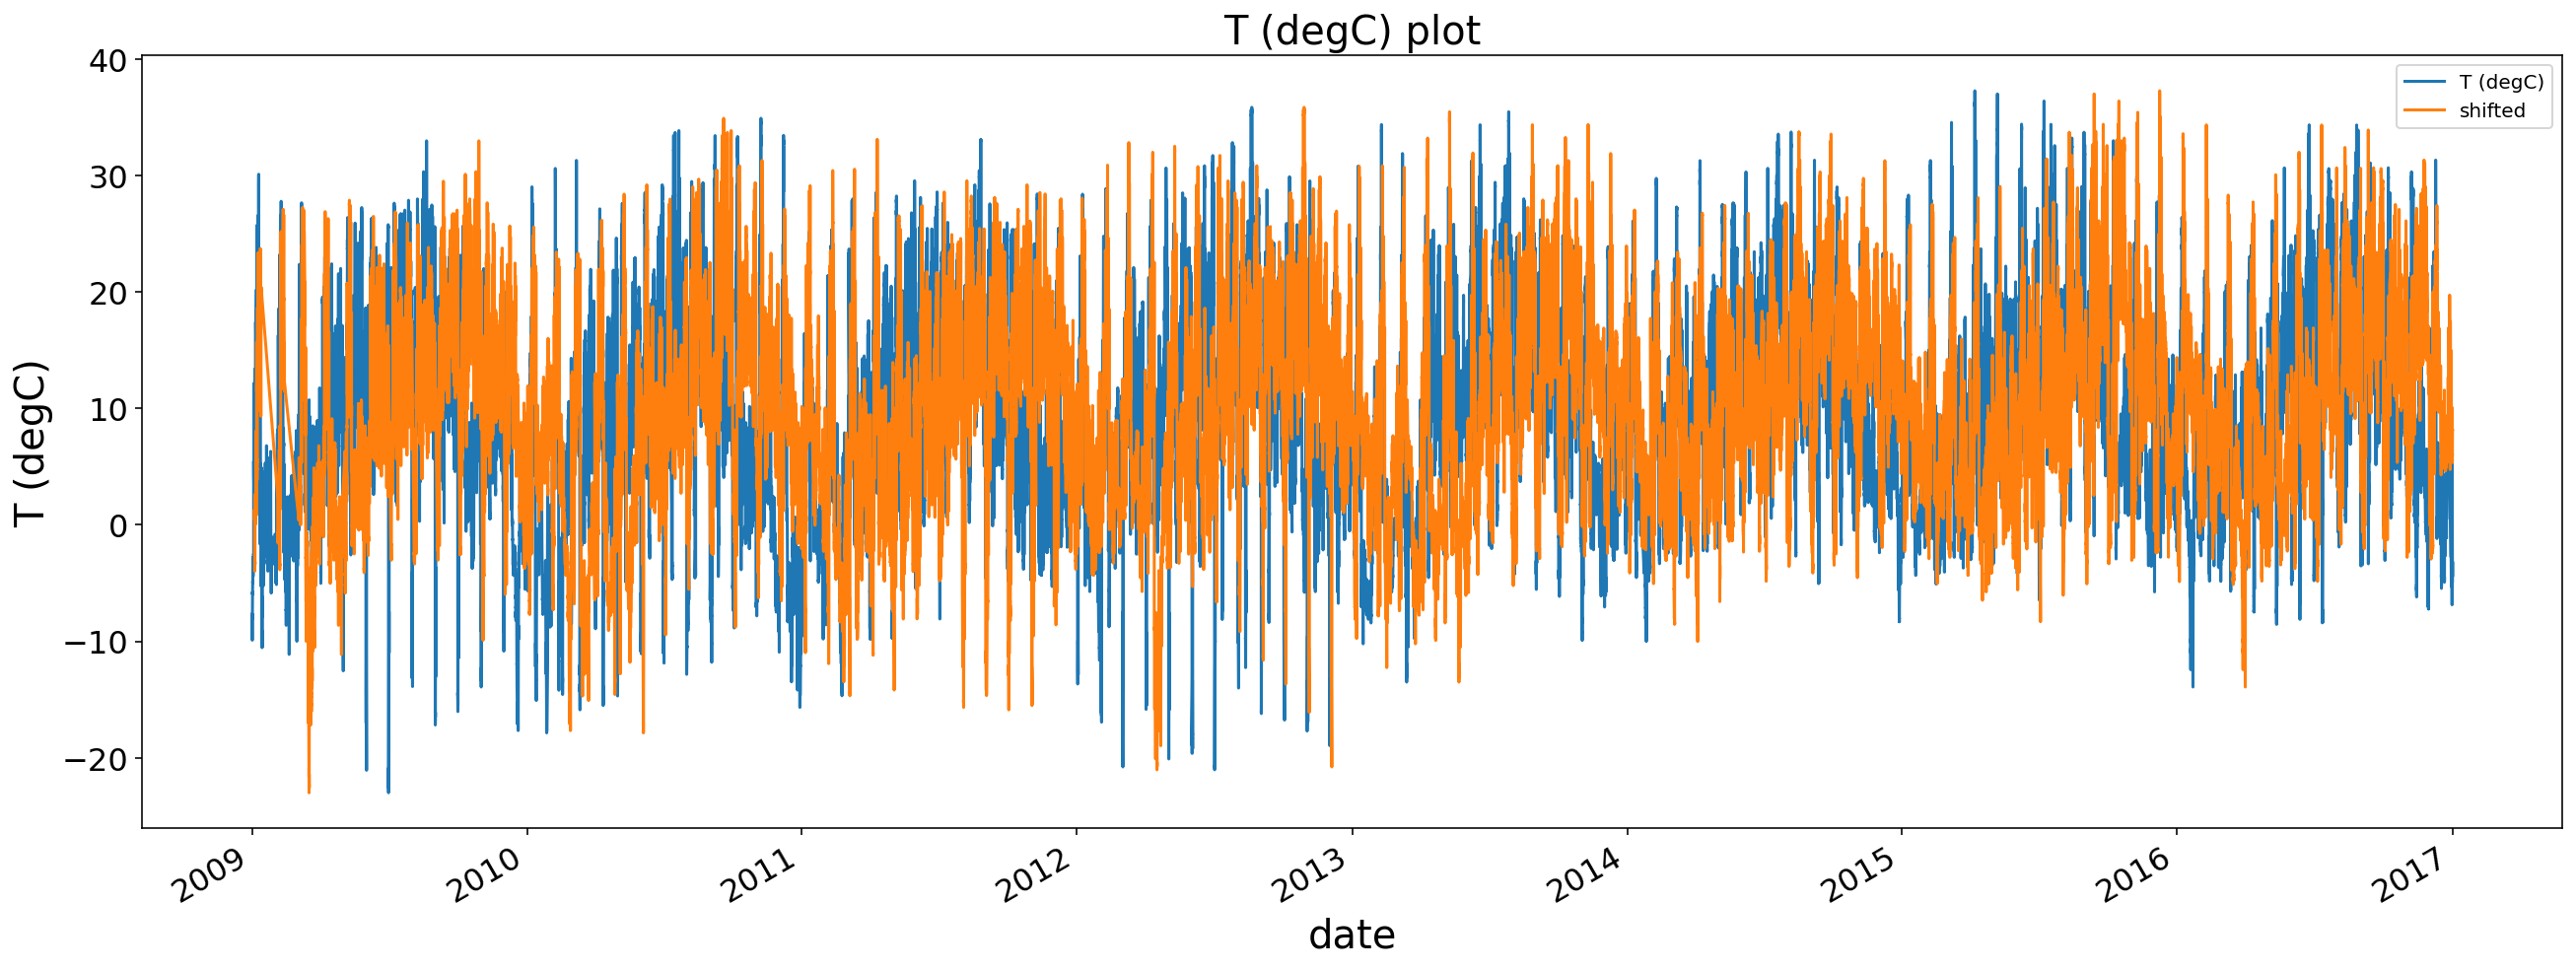

In [107]:
plt.figure(figsize=(22,8))
df[column_name].plot(fontsize=10, label=column_name)

df_shifted = df.shift(periods=shift_value)
df_shifted = df_shifted[shift_value:]
df_shifted[column_name].plot(fontsize=10, label='shifted')

plt.ylabel(column_name, fontsize=plot_font_size)
plt.xlabel('date', fontsize=plot_font_size), 
plt.title(f'{column_name} plot', fontsize=plot_font_size)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.legend()
plt.show()

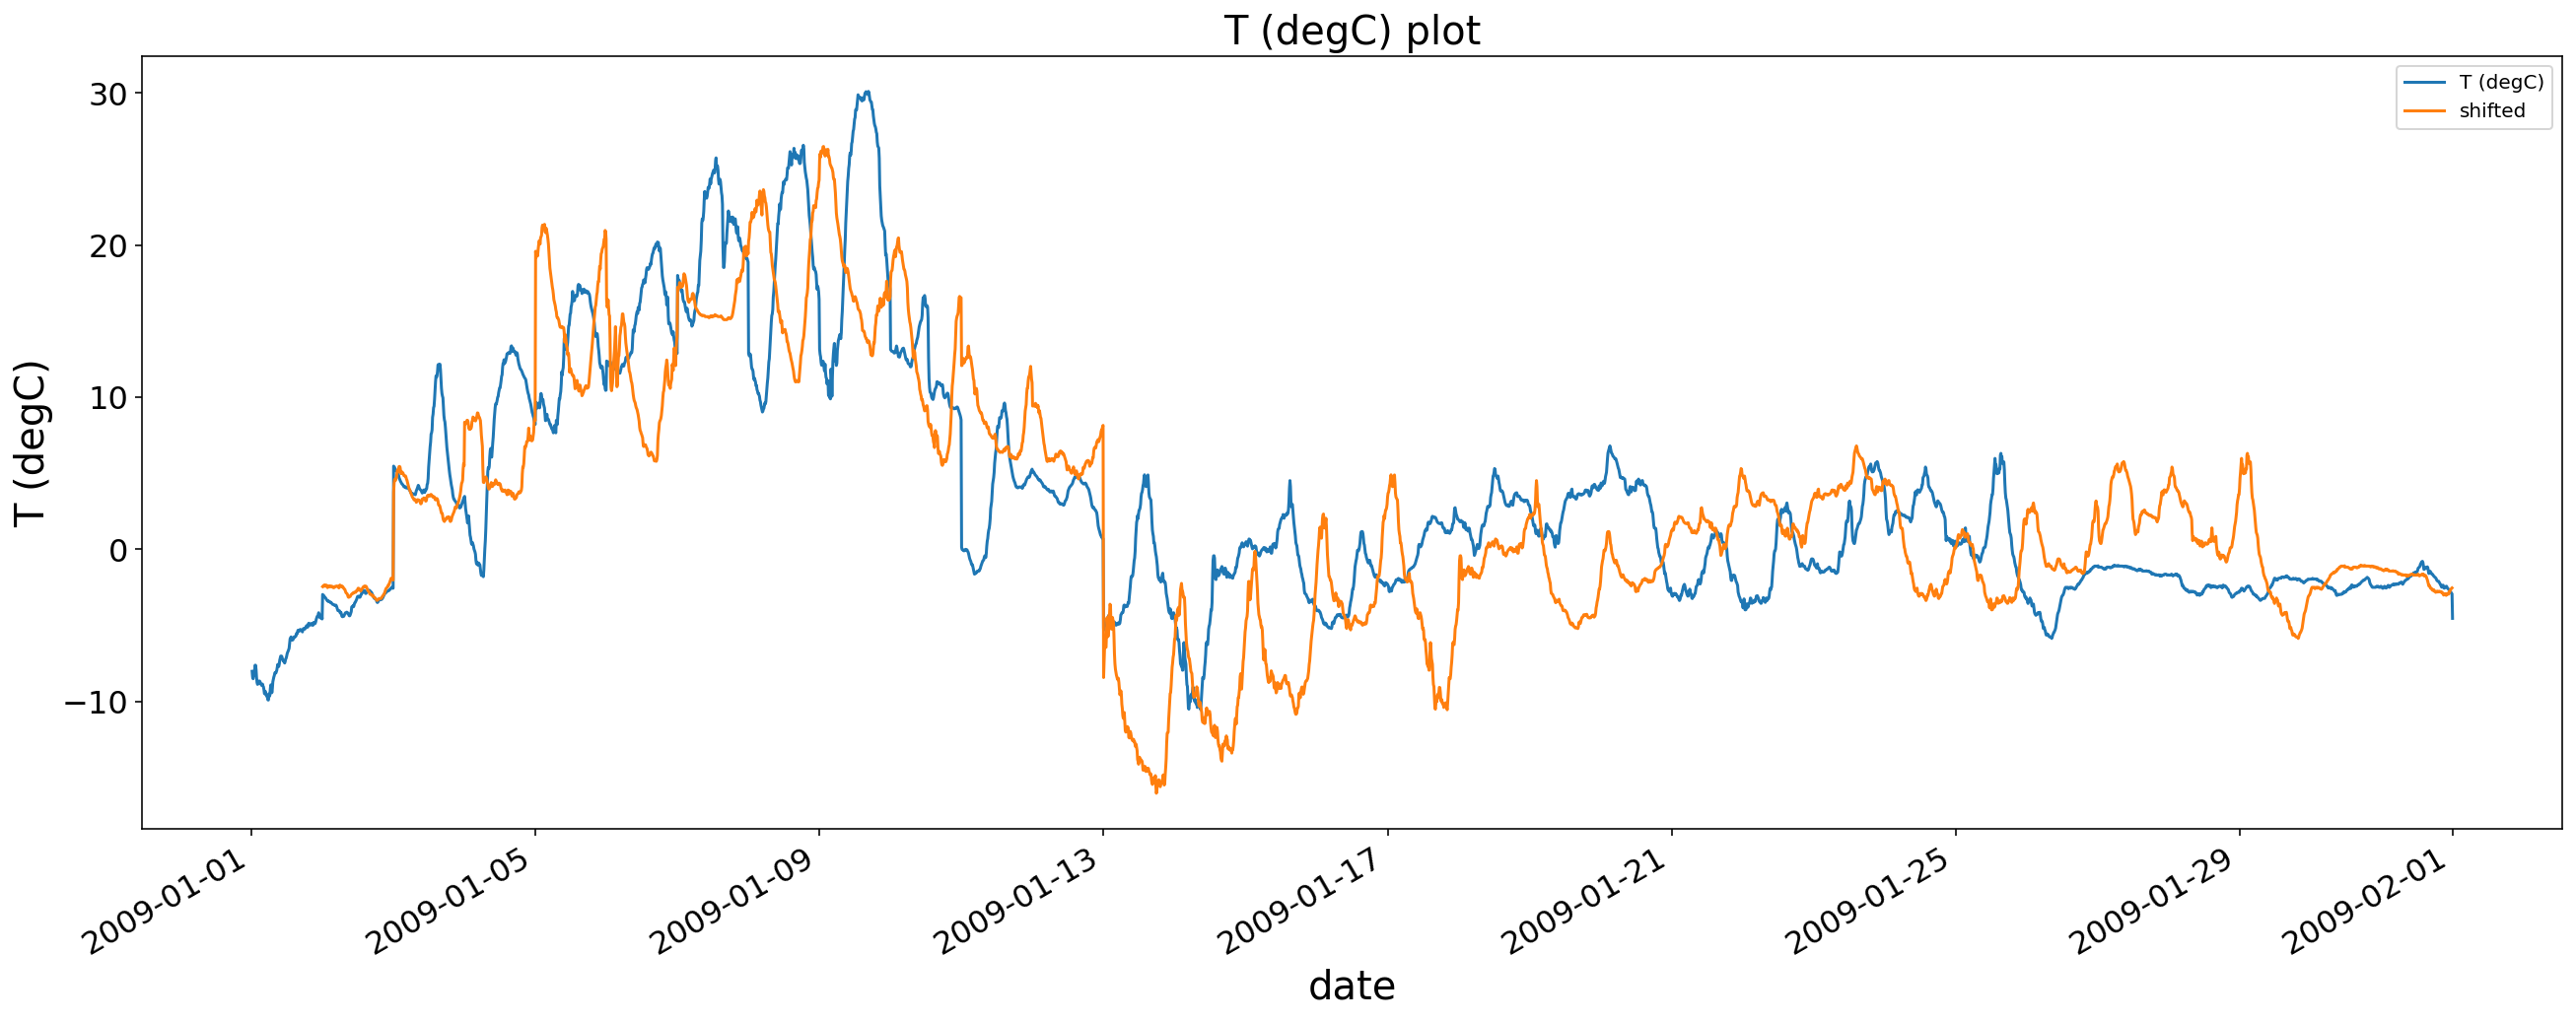

In [88]:
shift_value = 10
from_val = '2009-01-01 00:10:00'
to_val = '2009-02-01 00:00:00'
plot_font_size = 20
column_name = 'T (degC)'


plt.figure(figsize=(22,8))
df[column_name][from_val:to_val].plot(fontsize=10, label=column_name)

df_shifted = df.shift(periods=shift_value)
df_shifted = df_shifted[shift_value:]
df_shifted[column_name][from_val:to_val].plot(fontsize=10, label='shifted')

plt.ylabel(column_name, fontsize=plot_font_size)
plt.xlabel('date', fontsize=plot_font_size), 
plt.title(f'{column_name} plot', fontsize=plot_font_size)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.legend()
plt.show()

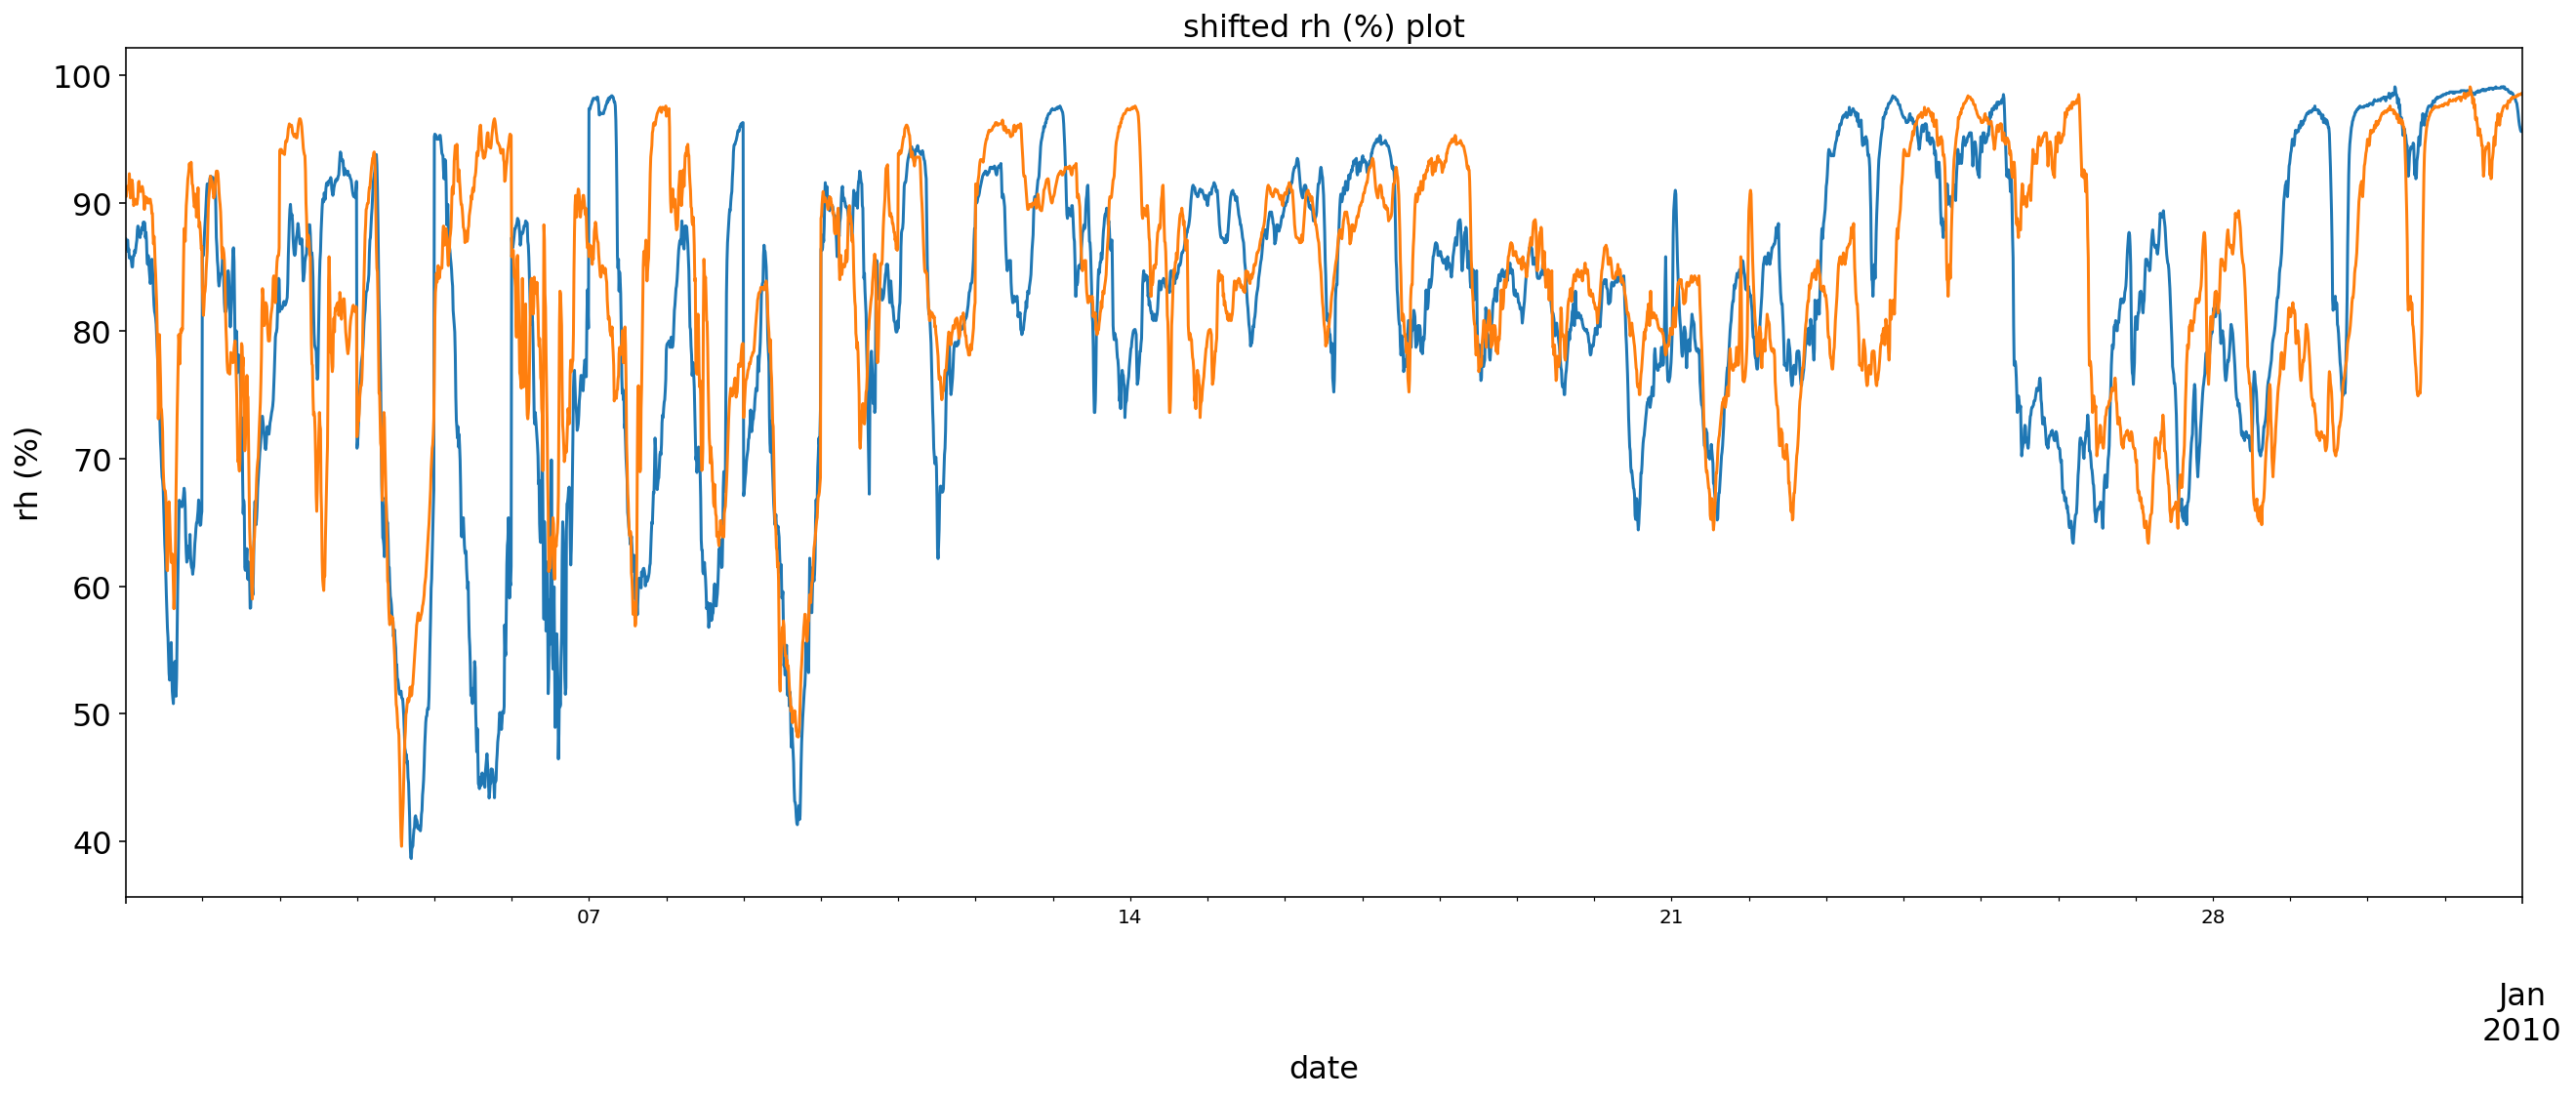

In [62]:
shift_value = 140
from_val = '2009-12-01 00:10:00'
to_val = '2010-01-01 00:00:00'
plot_font_size = 16
column_name = 'rh (%)'


plt.figure(figsize=(22,8))
df[column_name][from_val:to_val].plot(fontsize=10)
df_shifted = df.shift(periods=shift_value)
df_shifted[column_name][from_val:to_val].plot(fontsize=10)
plt.ylabel(column_name, fontsize=plot_font_size),plt.xlabel('date', fontsize=plot_font_size), 
plt.title(f'shifted {column_name} plot', fontsize=plot_font_size)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

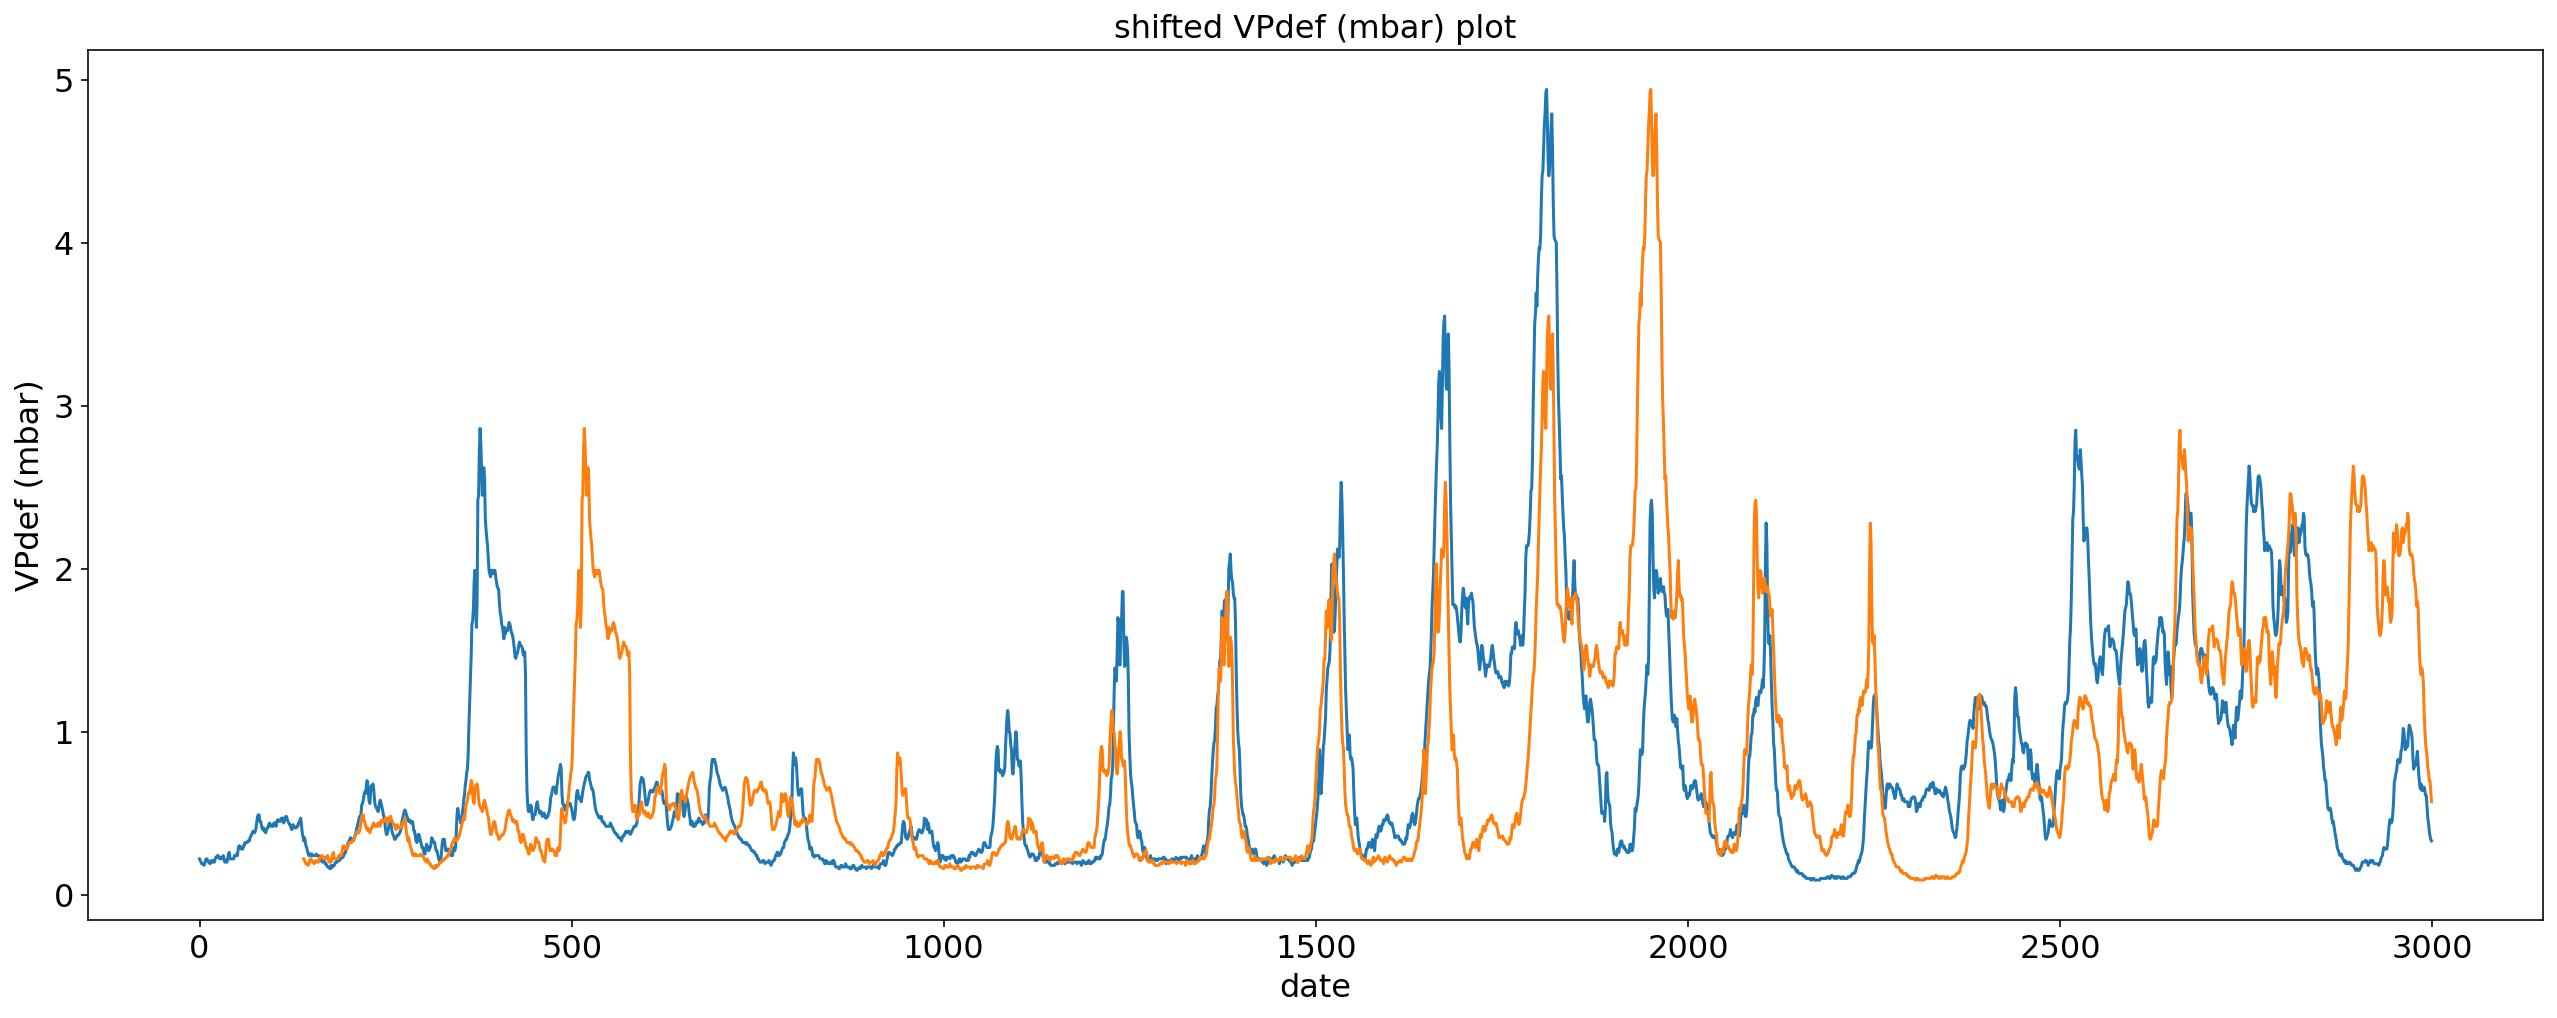

In [32]:
shift_value = 140
from_val = 0
to_val = 3000
plot_font_size = 16
column_name = 'VPdef (mbar)'


plt.figure(figsize=(22,8))
df[column_name][from_val:to_val].plot(fontsize=10)
df_shifted = df.shift(periods=shift_value)
df_shifted[column_name][from_val:to_val].plot(fontsize=10)
plt.ylabel(column_name, fontsize=plot_font_size),plt.xlabel('date', fontsize=plot_font_size), 
plt.title(f'shifted {column_name} plot', fontsize=plot_font_size)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

normalizing data and comparing the timeseries data

In [33]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install sklearn
from sklearn.preprocessing import MinMaxScaler

In [34]:
cols = ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']
ts = df[cols]
ts_norm = (ts - ts.min()) / (ts.max() - ts.min())

In [35]:
ts_norm.head()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)    rh (%)  VPmax (mbar)  \
0  0.814939  0.248632  0.243662     0.334788  0.923033      0.037886   
1  0.815430  0.242163  0.237241     0.326891  0.924182      0.036294   
2  0.815037  0.240504  0.235594     0.326268  0.929925      0.035976   
3  0.814840  0.243822  0.239052     0.331255  0.933372      0.036772   
4  0.814840  0.244485  0.239546     0.331879  0.932223      0.036931   

   VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
0      0.084272      0.004782   0.081679         0.082798      0.743213   
1      0.081003      0.004564   0.078843         0.079586      0.749349   
2      0.080639      0.004347   0.078276         0.079229      0.750666   
3      0.082819      0.004130   0.080545         0.081370      0.747523   
4      0.083182      0.004130   0.080545         0.081727      0.746954   

   wv (m/s)  max. wv (m/s)  wd (deg)  
0  0.997262       0.997830  0.423056  
1  0.997231       0.997805  0.378056  
2  0.997178       0.997718  0.476667  
3  0.997193       0.997705  0.550000  
4  0.997191       0.997718  0.595278

In [36]:
ts_norm.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

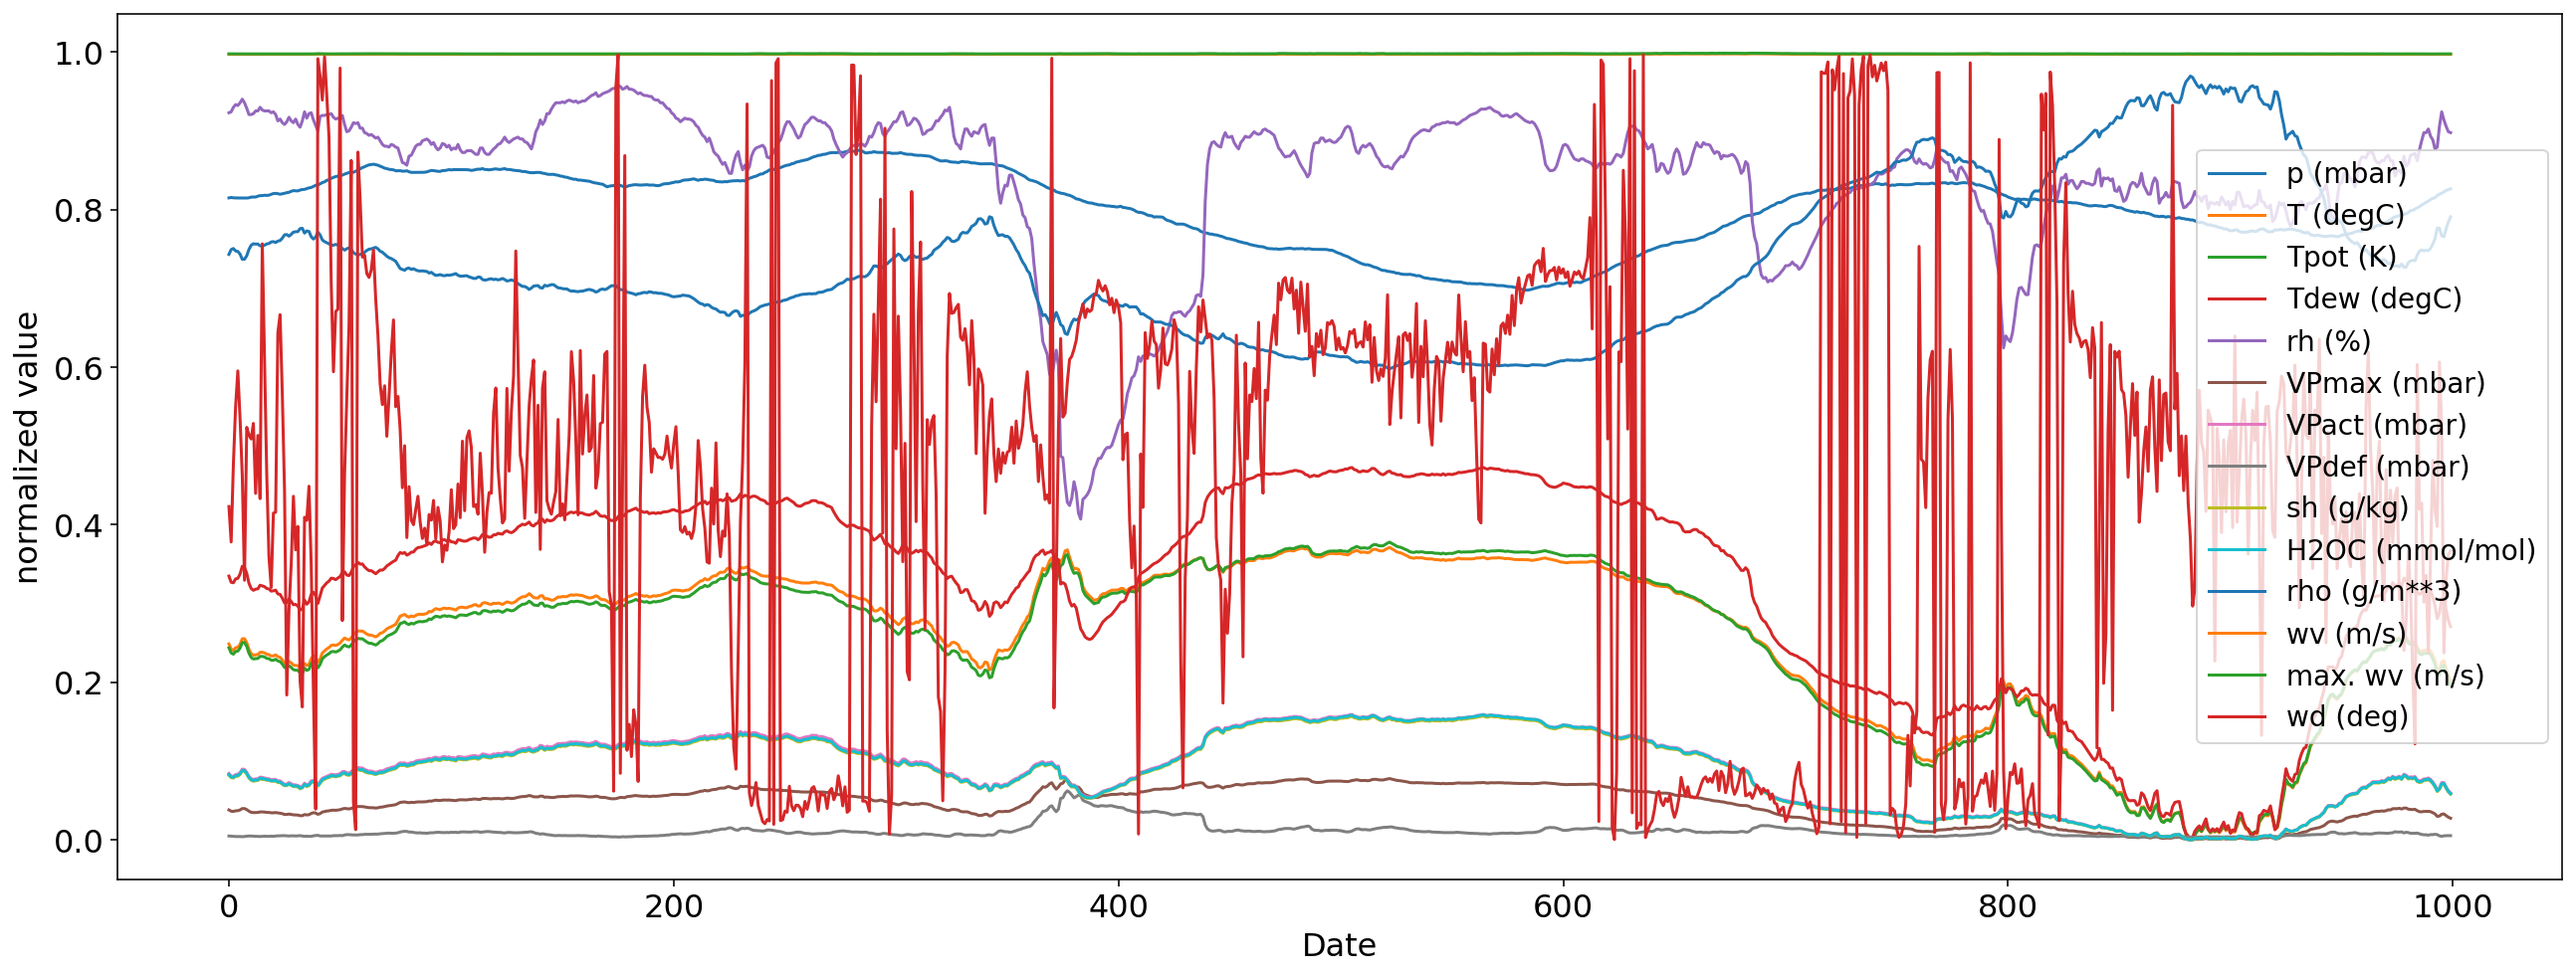

In [37]:
cols = ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']


plt.figure(figsize=(22,8))
plt.plot(ts_norm[cols][0:1000],label=cols)
plt.legend(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('normalized value', fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

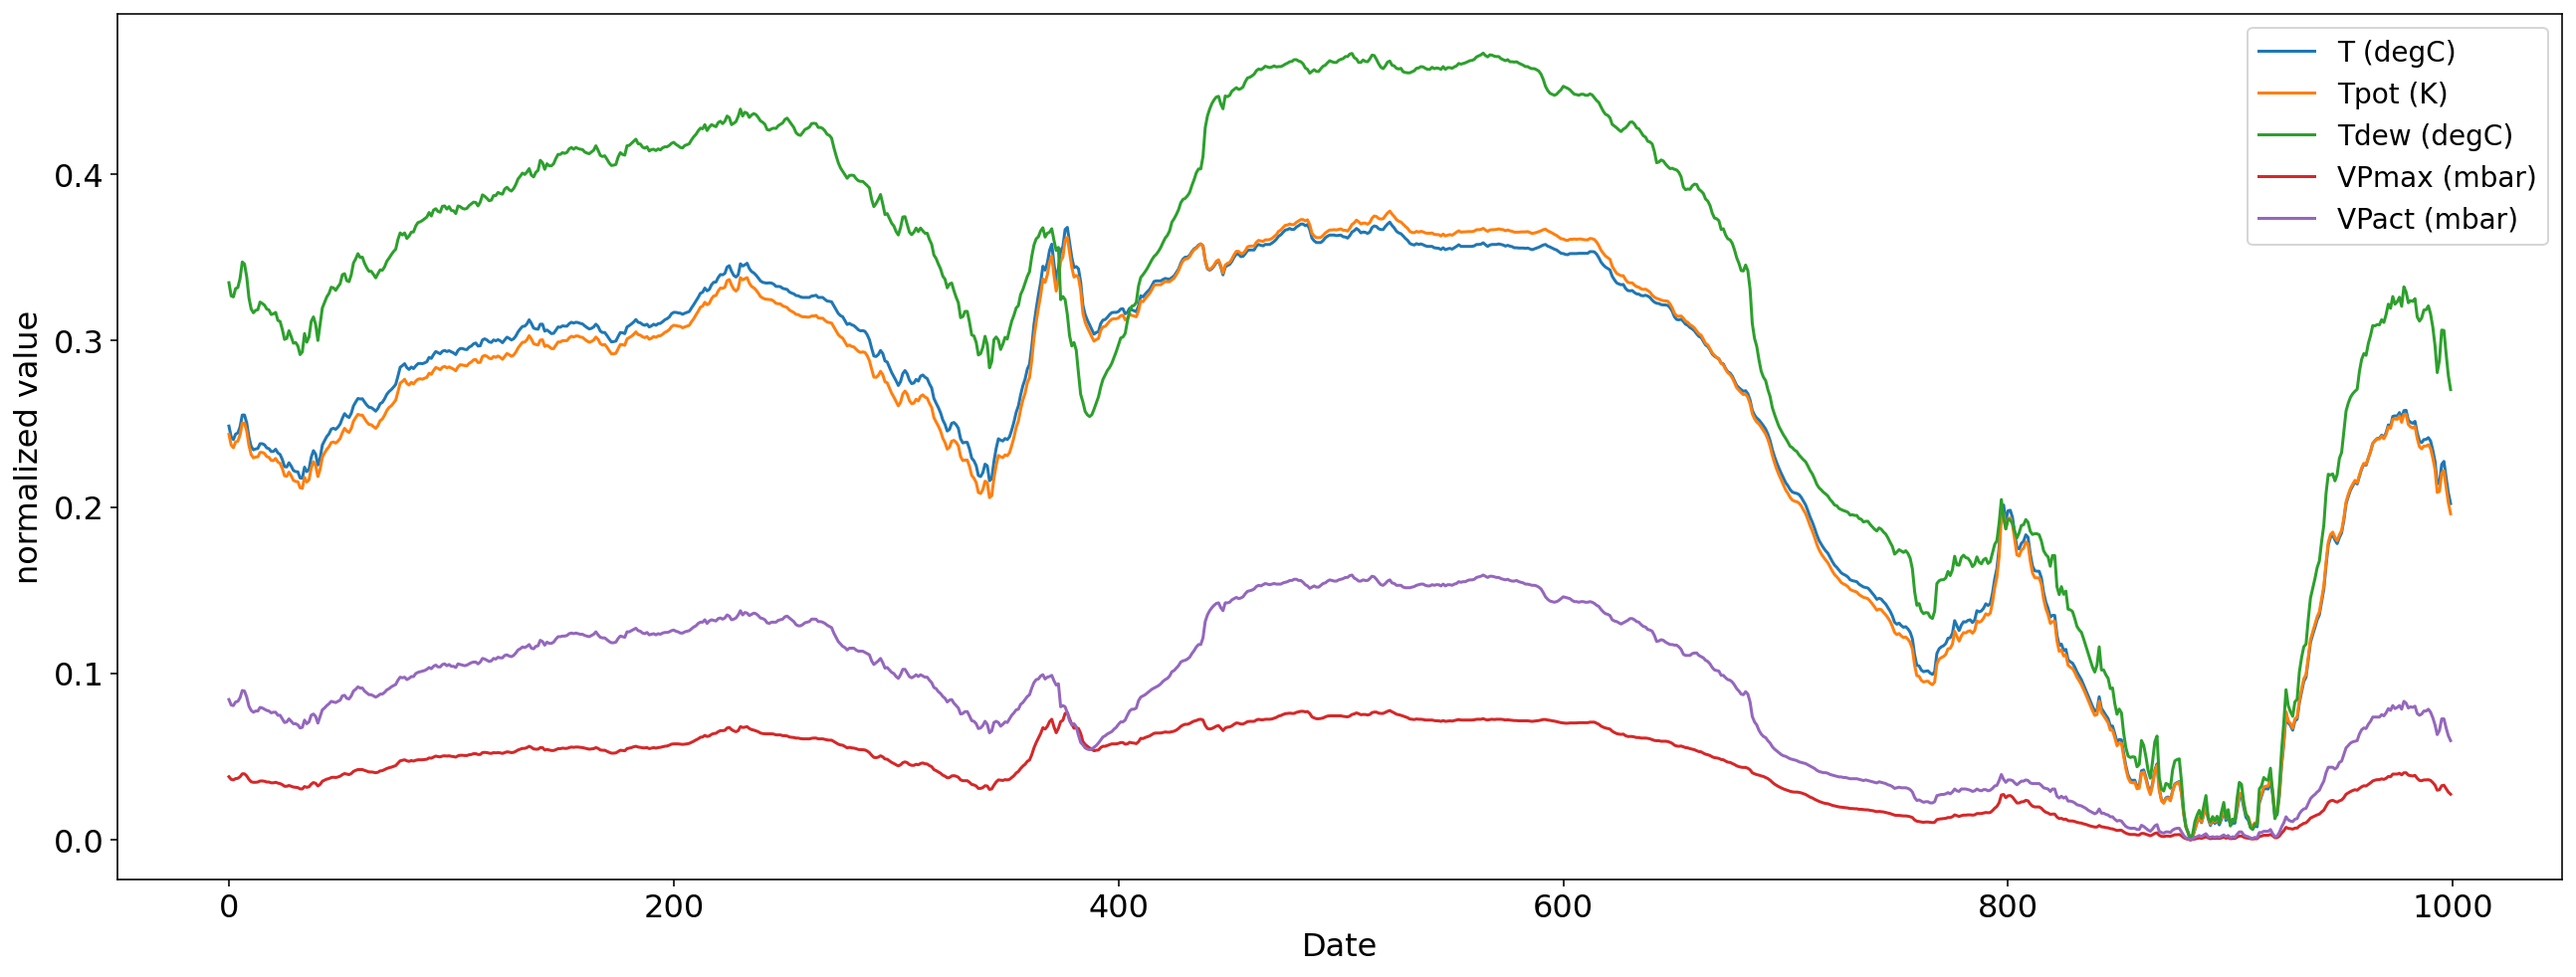

In [38]:
cols = ['T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'VPmax (mbar)', 'VPact (mbar)']


plt.figure(figsize=(22,8))
plt.plot(ts_norm[cols][0:1000],label=cols)
plt.legend(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('normalized value', fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

'T (degC)' and 'Tpot (K)' are overlaid.

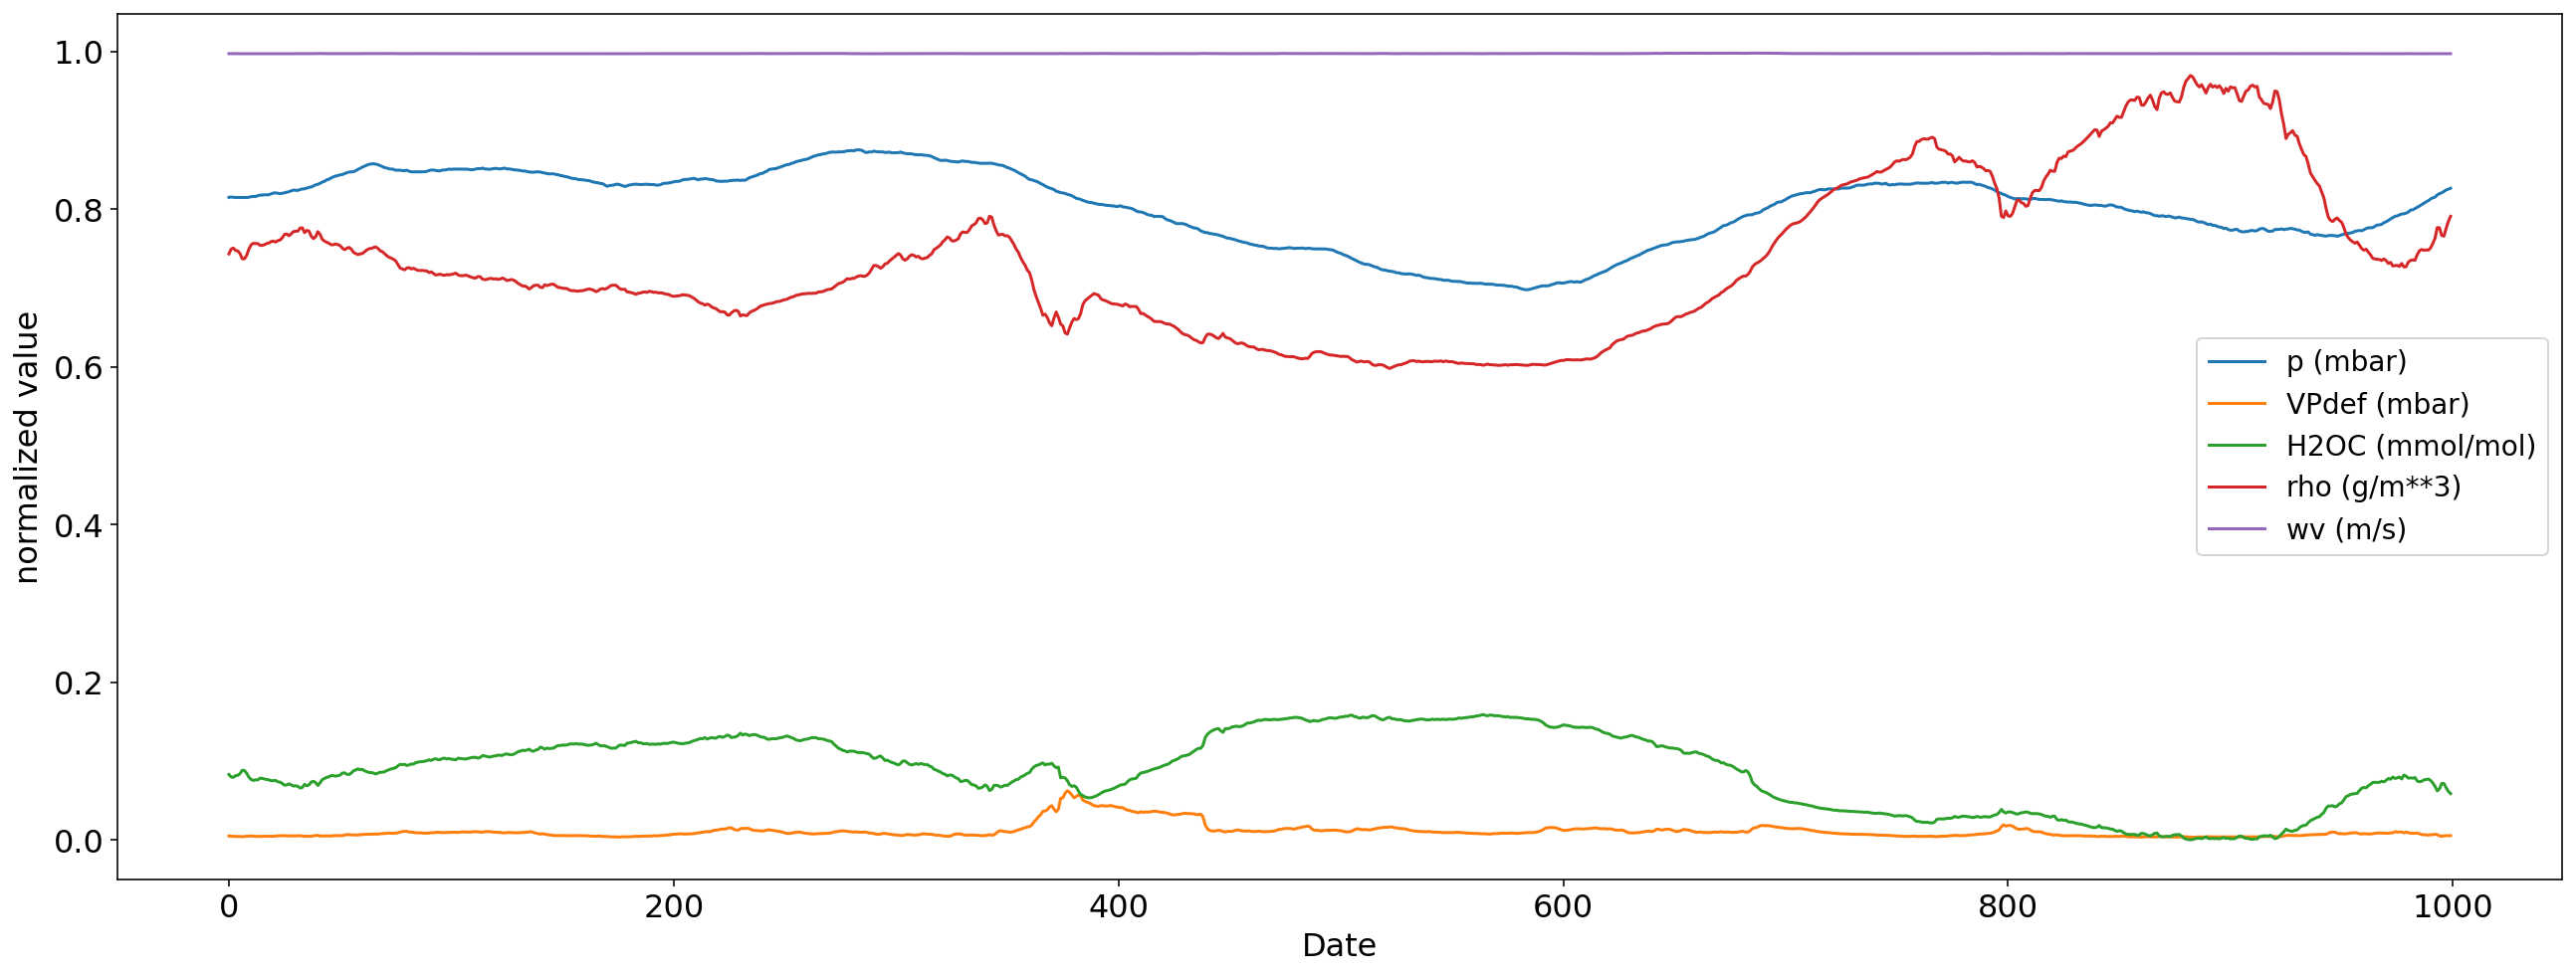

In [39]:
cols = ['p (mbar)', 'VPdef (mbar)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)',
       ]


plt.figure(figsize=(22,8))
plt.plot(ts_norm[cols][0:1000],label=cols)
plt.legend(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('normalized value', fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

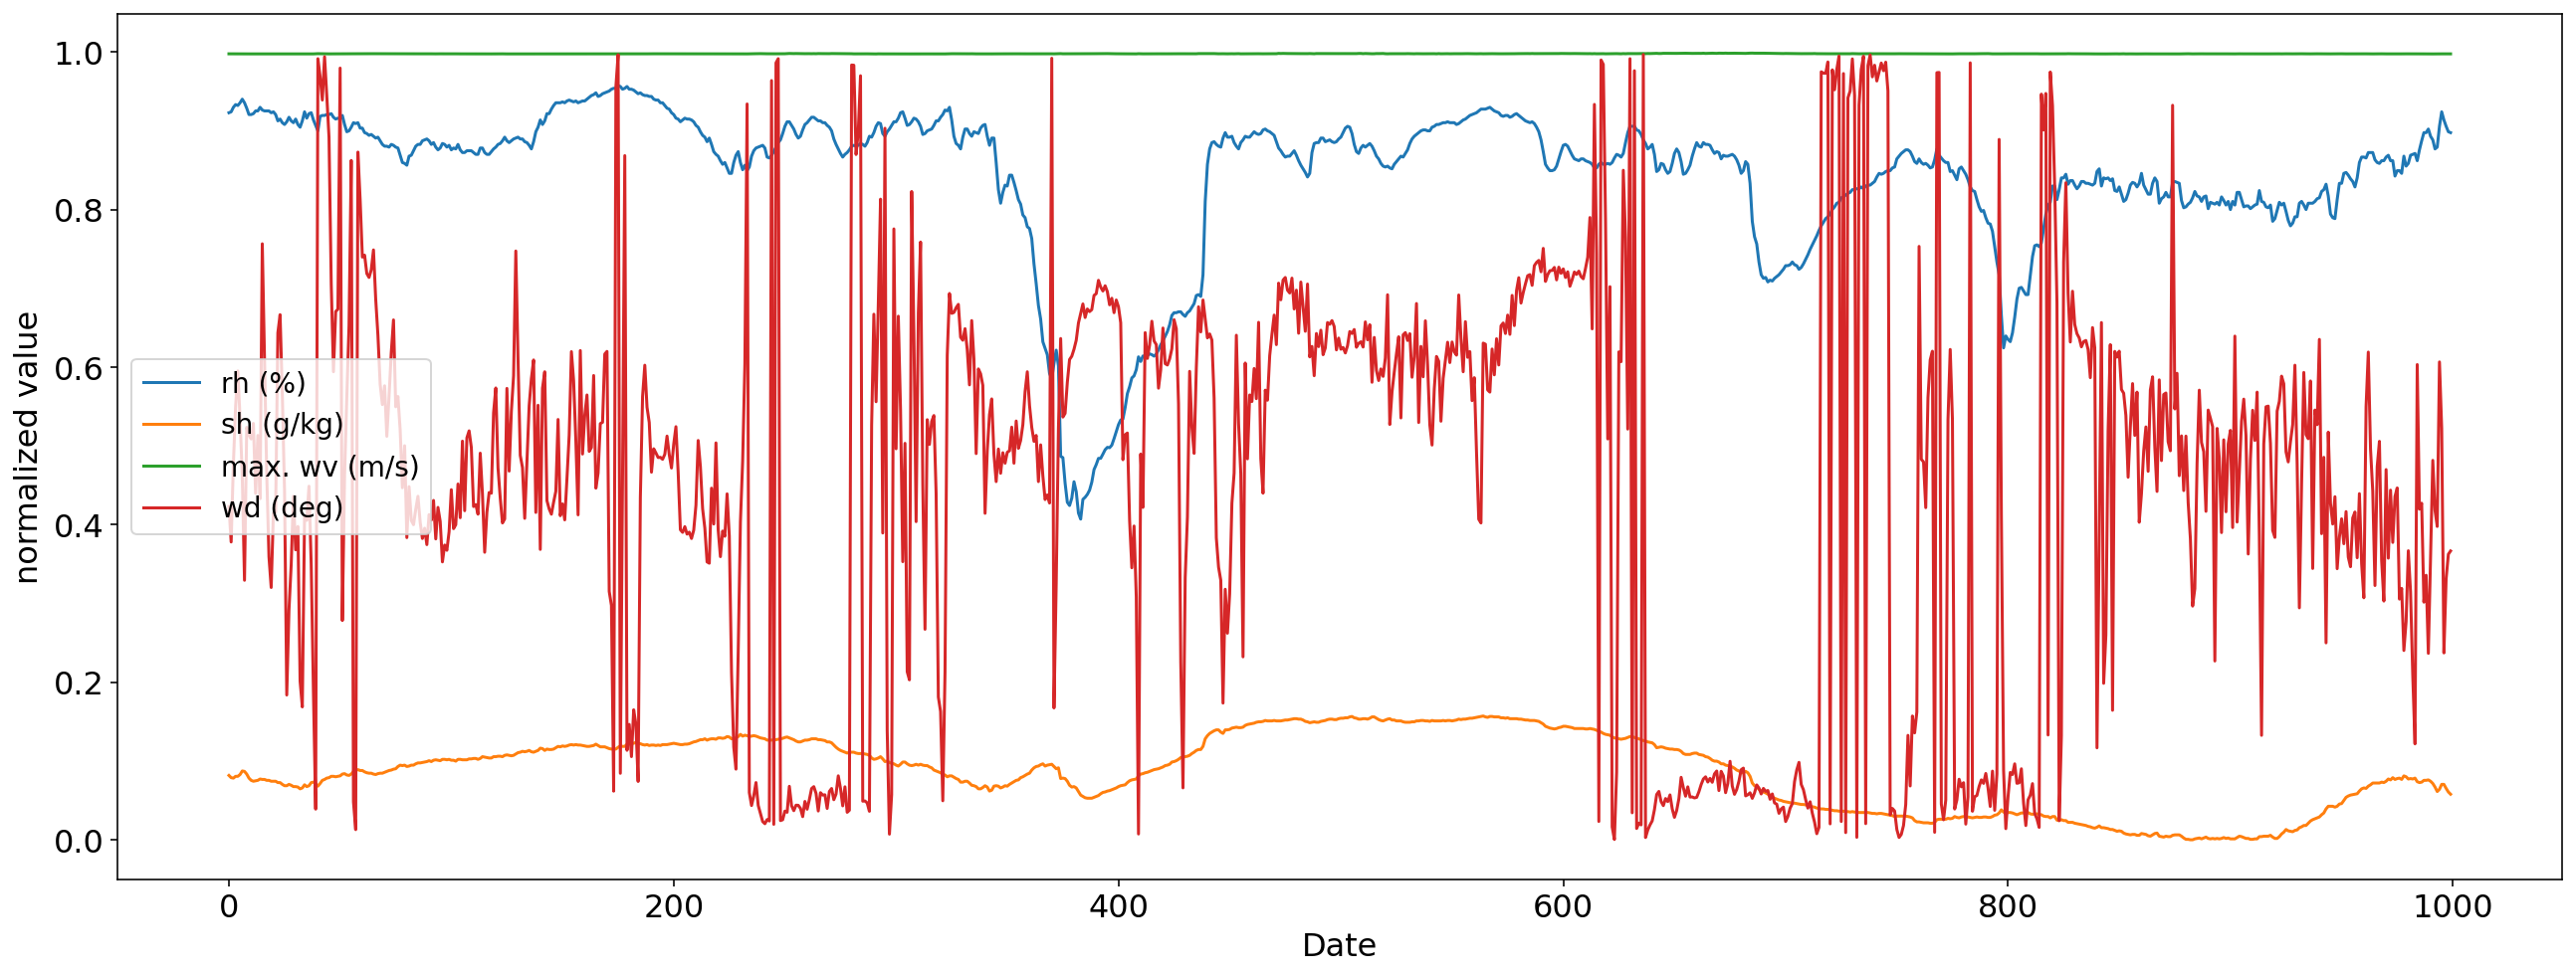

In [40]:
cols = [ 'rh (%)', 'sh (g/kg)', 'max. wv (m/s)',
       'wd (deg)']


plt.figure(figsize=(22,8))
plt.plot(ts_norm[cols][0:1000],label=cols)
plt.legend(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('normalized value', fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

it is seen that the 'sh (g/kg)' and H2OC (mmol/mol) are overlaid. The 'max. wv (m/s)' is constant.

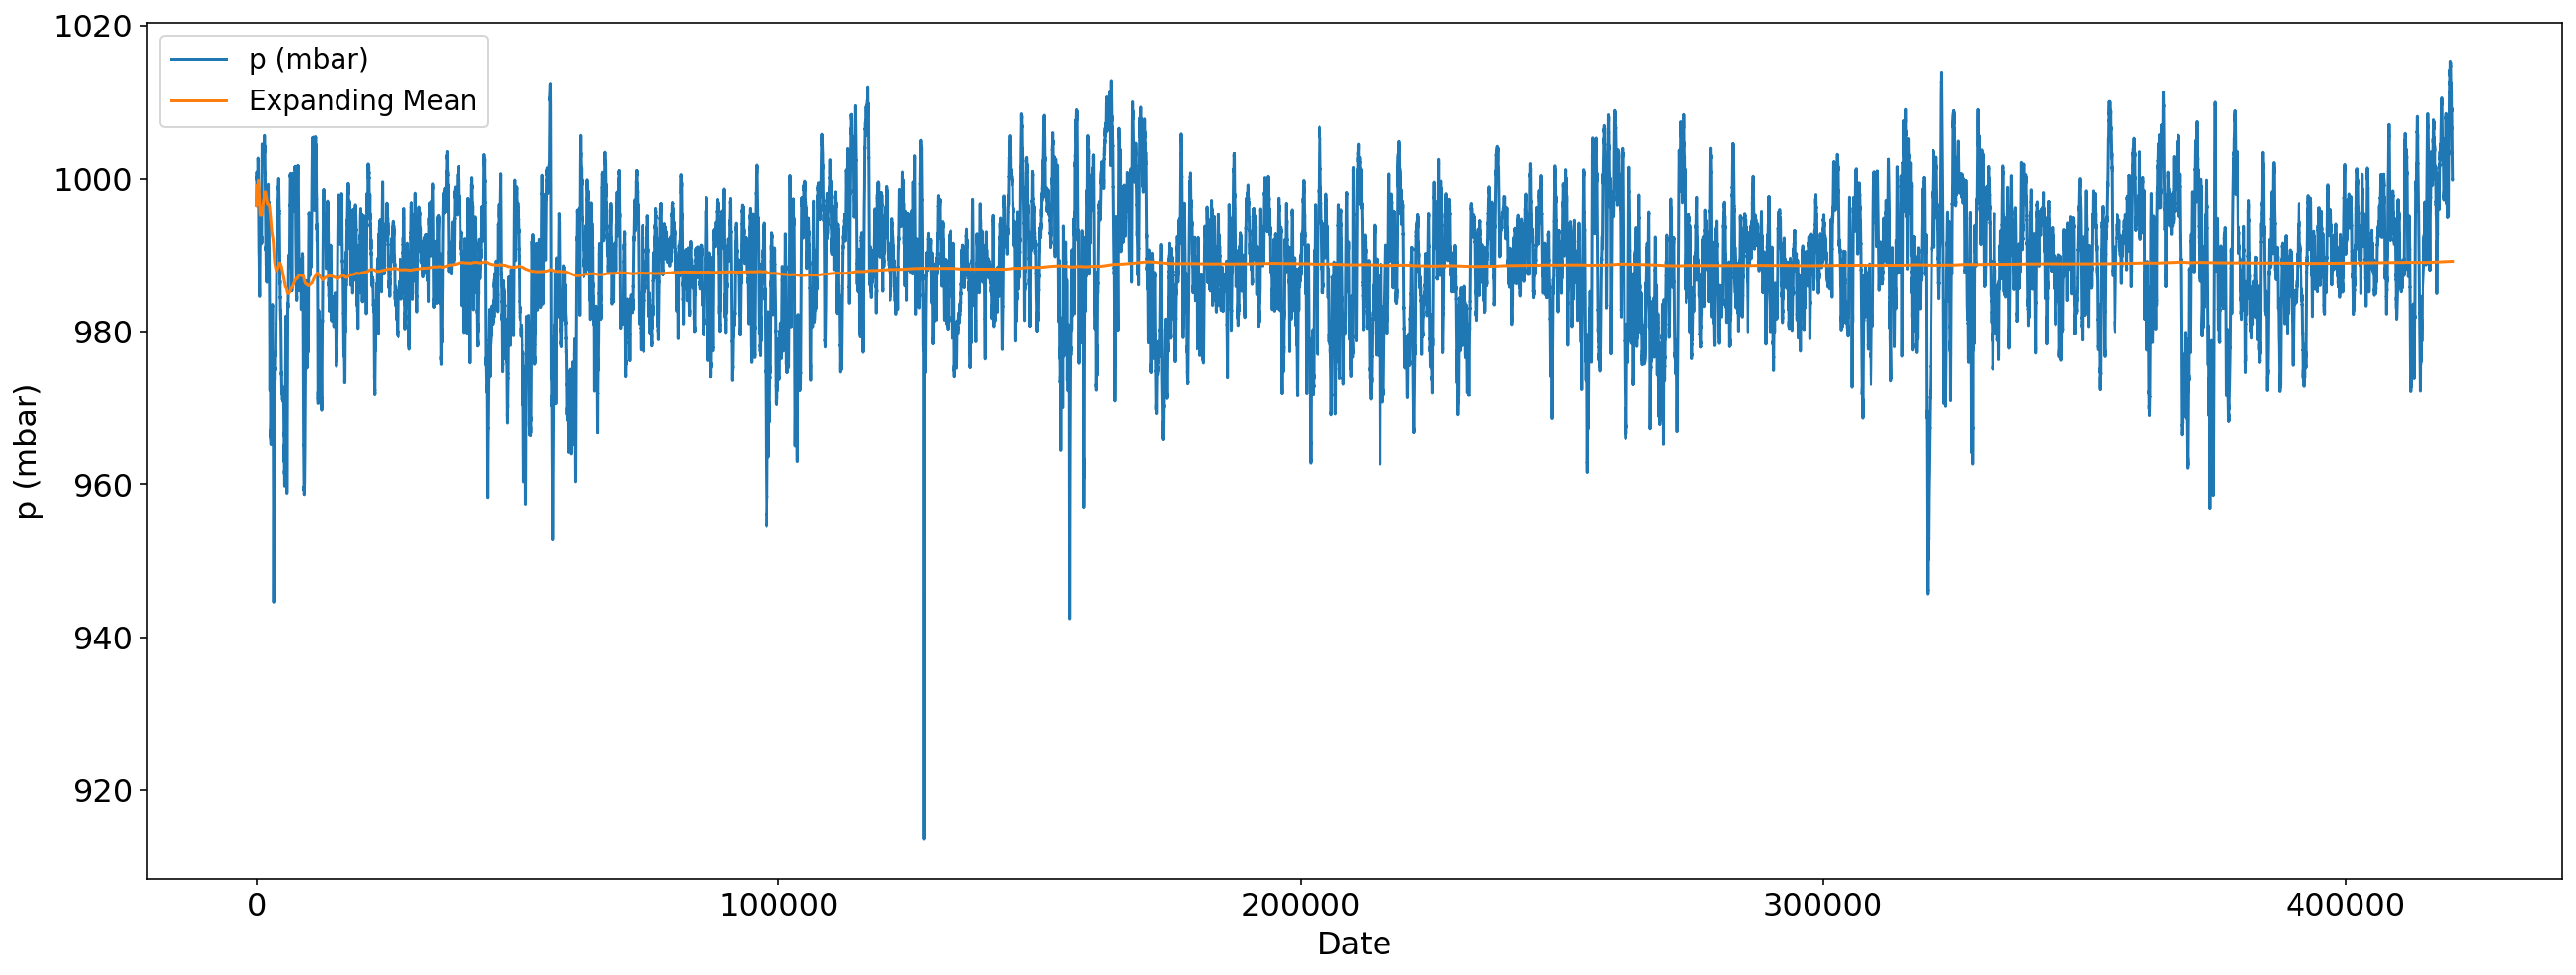

In [41]:
# ref: https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series
plt.figure(figsize=(22,8))
col_name = 'p (mbar)'
df_mean = df[col_name].expanding().mean()
# df_std = df['p (mbar)'][0:1000].expanding().std()
df[col_name].plot()
df_mean.plot()
# df_std.plot()
plt.legend([col_name, 'Expanding Mean'], fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel(col_name, fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

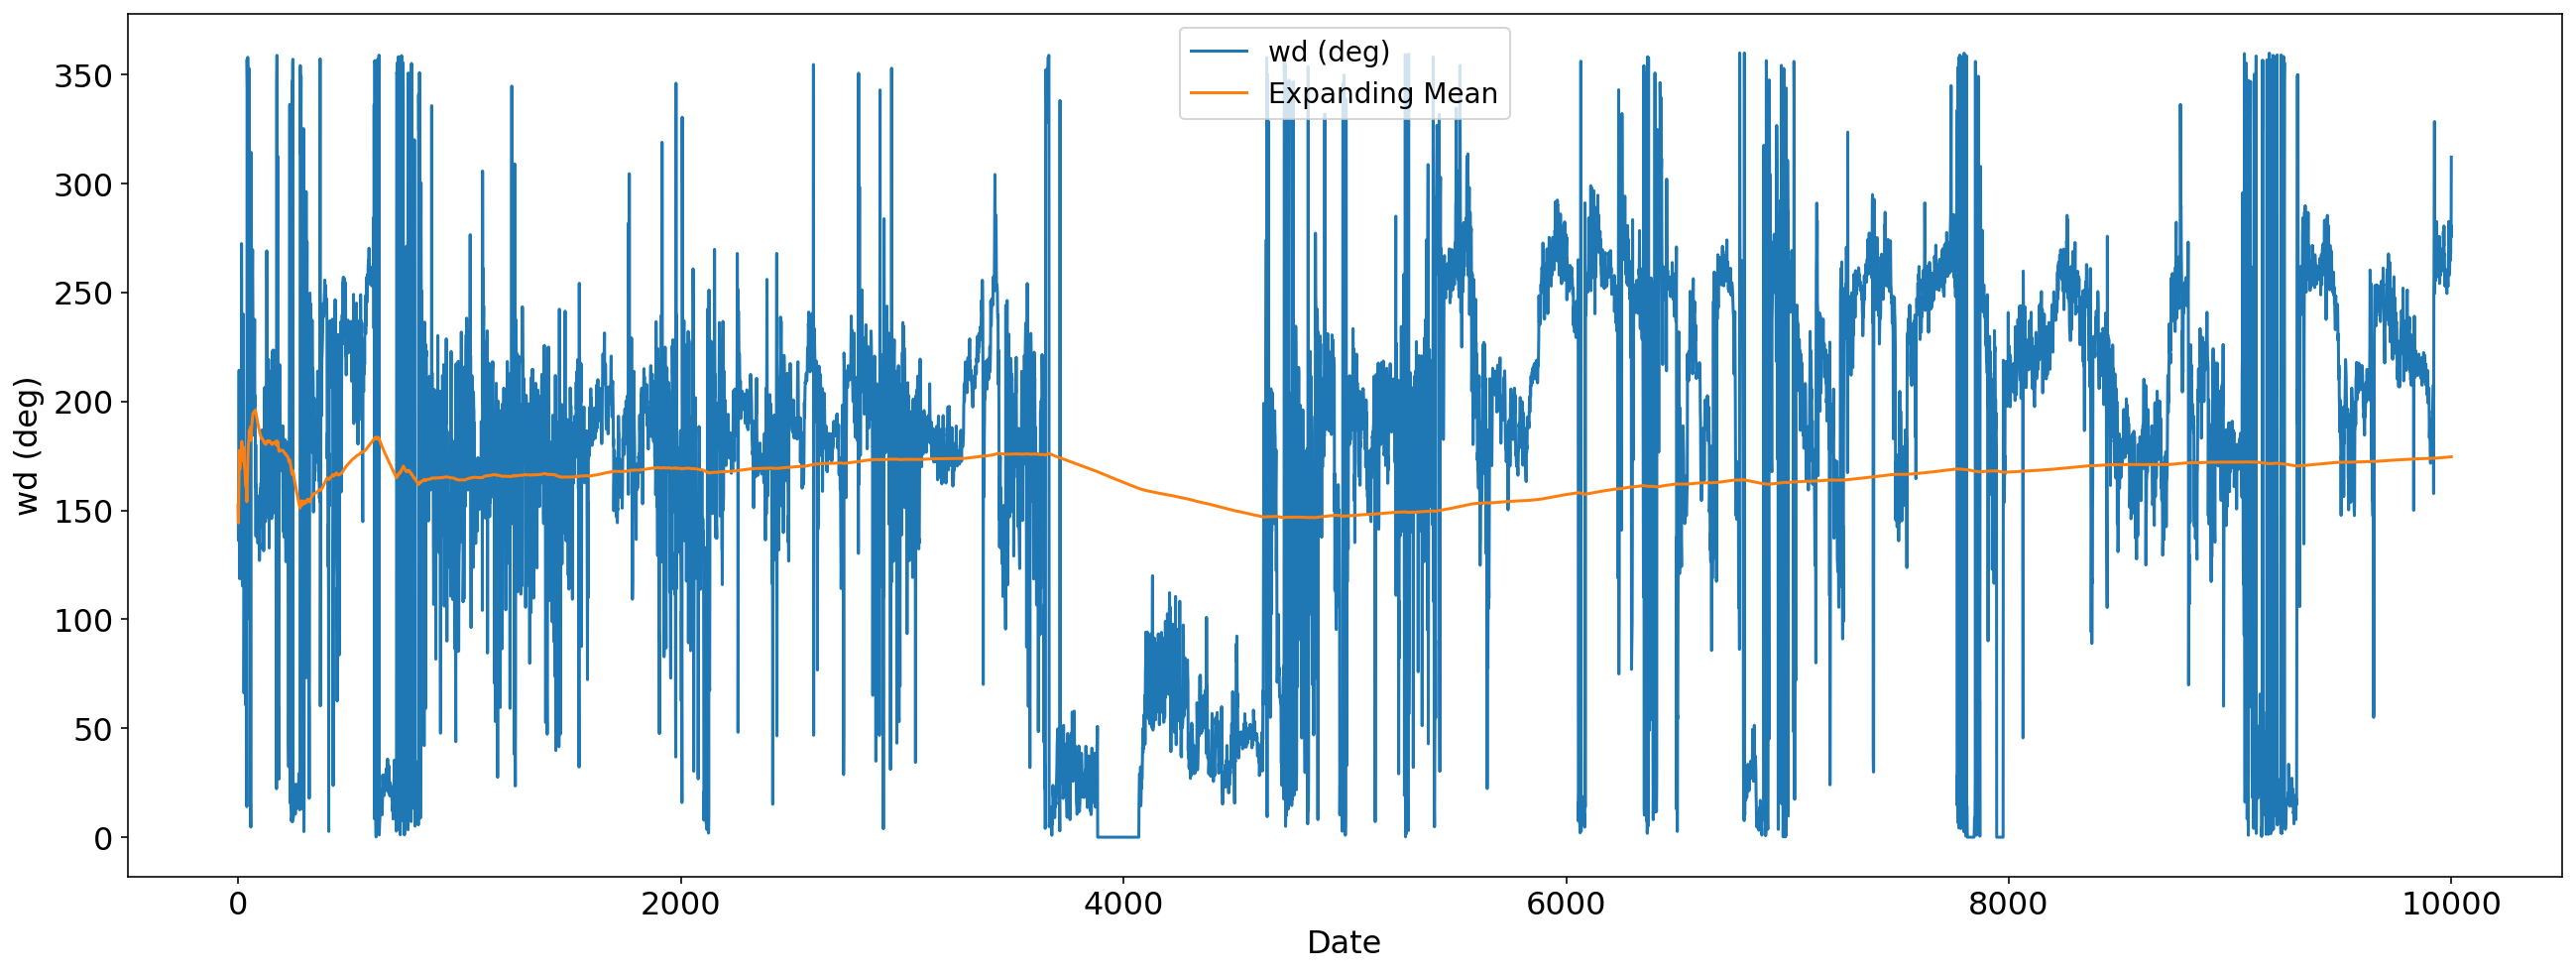

In [42]:
# ref: https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series
plt.figure(figsize=(22,8))
col_name = 'wd (deg)'
to_val = 10000

df_mean = df[col_name][0:to_val].expanding().mean()
# df_std = df['p (mbar)'][0:1000].expanding().std()
df[col_name][0:to_val].plot()
df_mean.plot()
# df_std.plot()
plt.legend([col_name, 'Expanding Mean'], fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel(col_name, fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

### Autocorrelation and Partial Autocorrelation

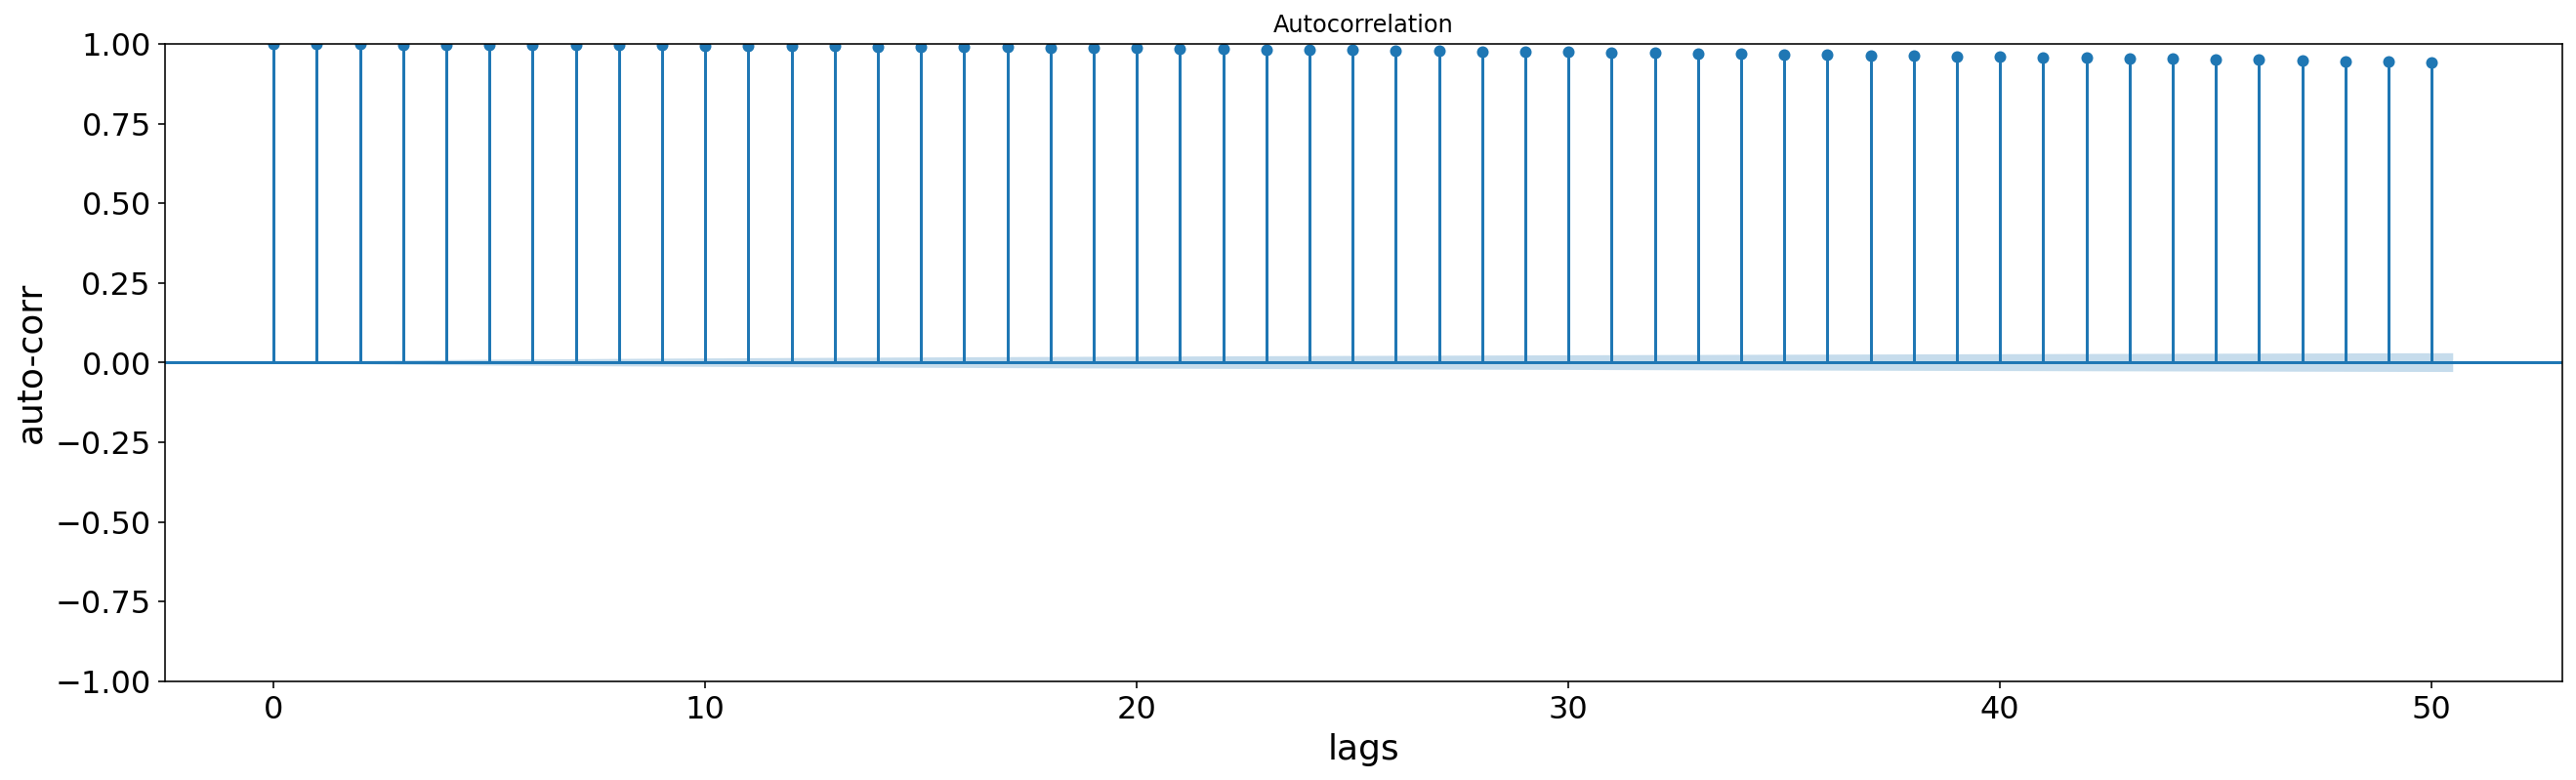

In [43]:
plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_acf(df['p (mbar)'].values.squeeze(), lags=50)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

the above plot indicates that past values influence the current value for pressure parameter.

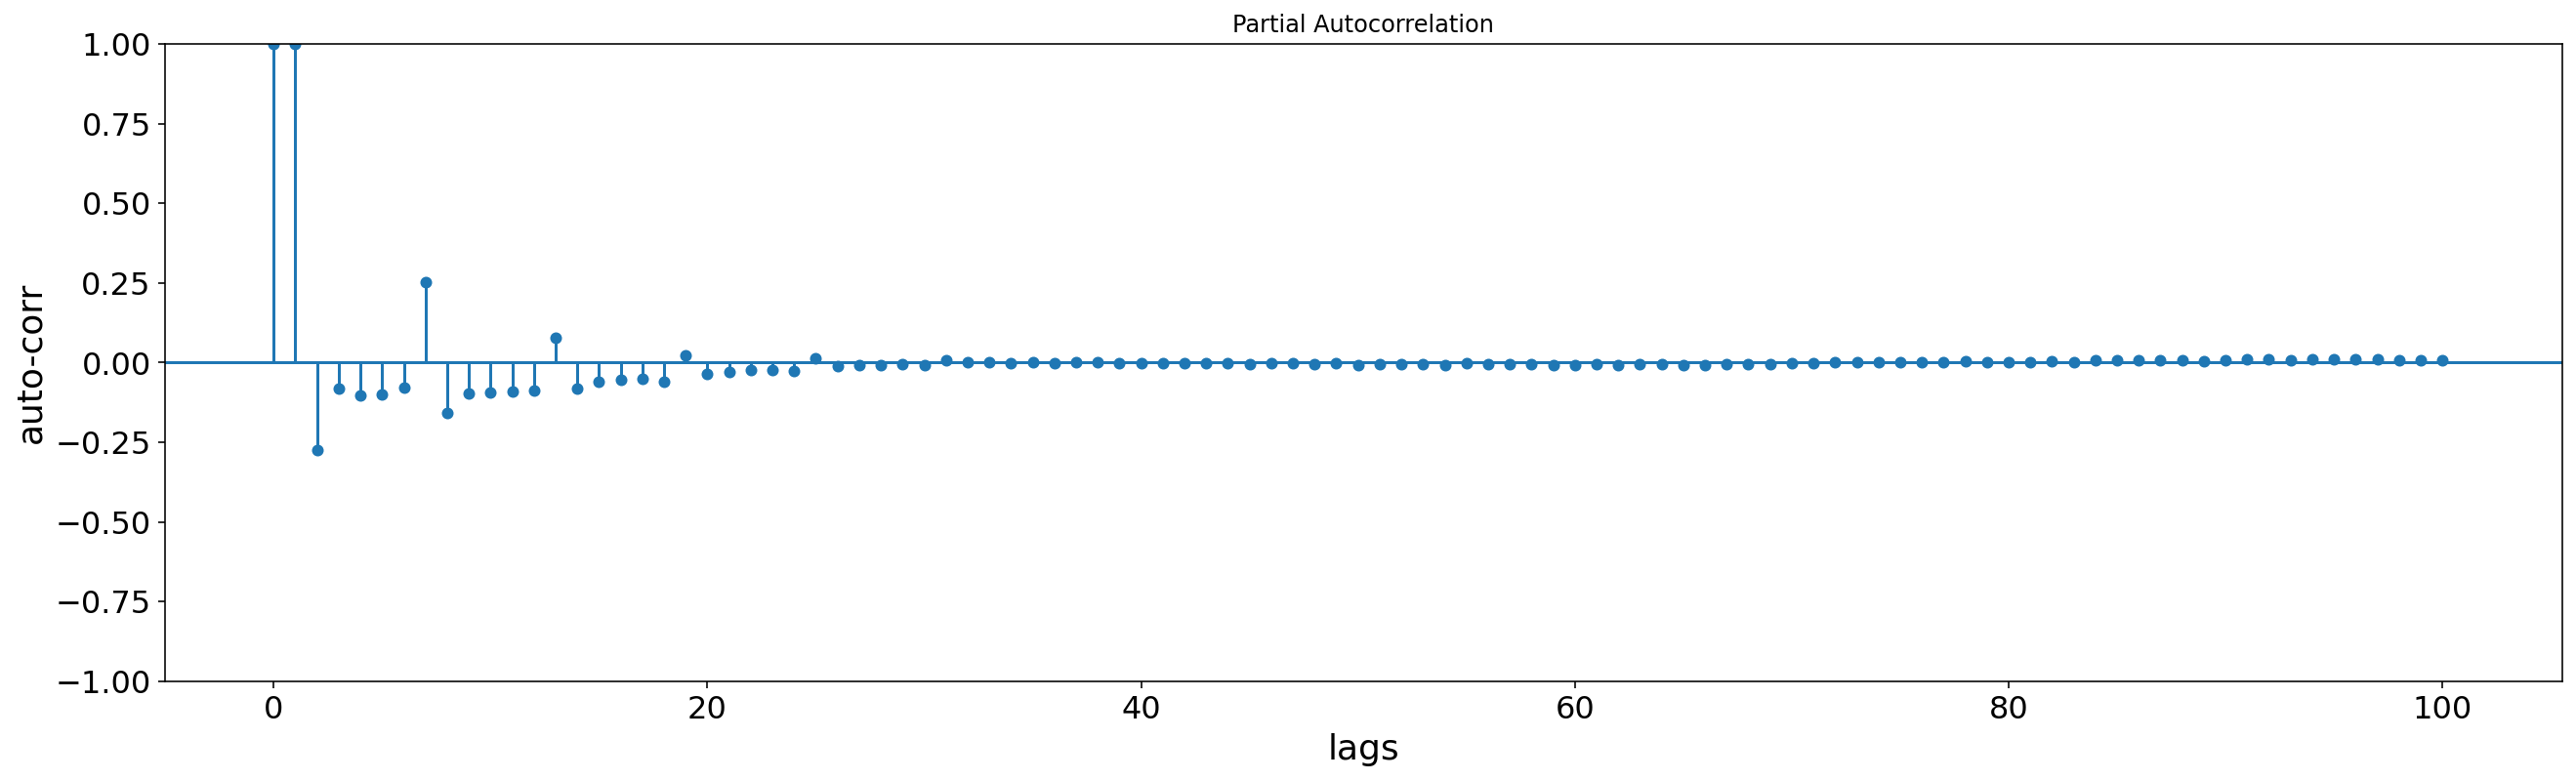

In [44]:
plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_pacf(df['p (mbar)'].values.squeeze(), lags=100)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

as it is observed the partial autocorrelation after two lags are pretty low which is sign of stationary data.

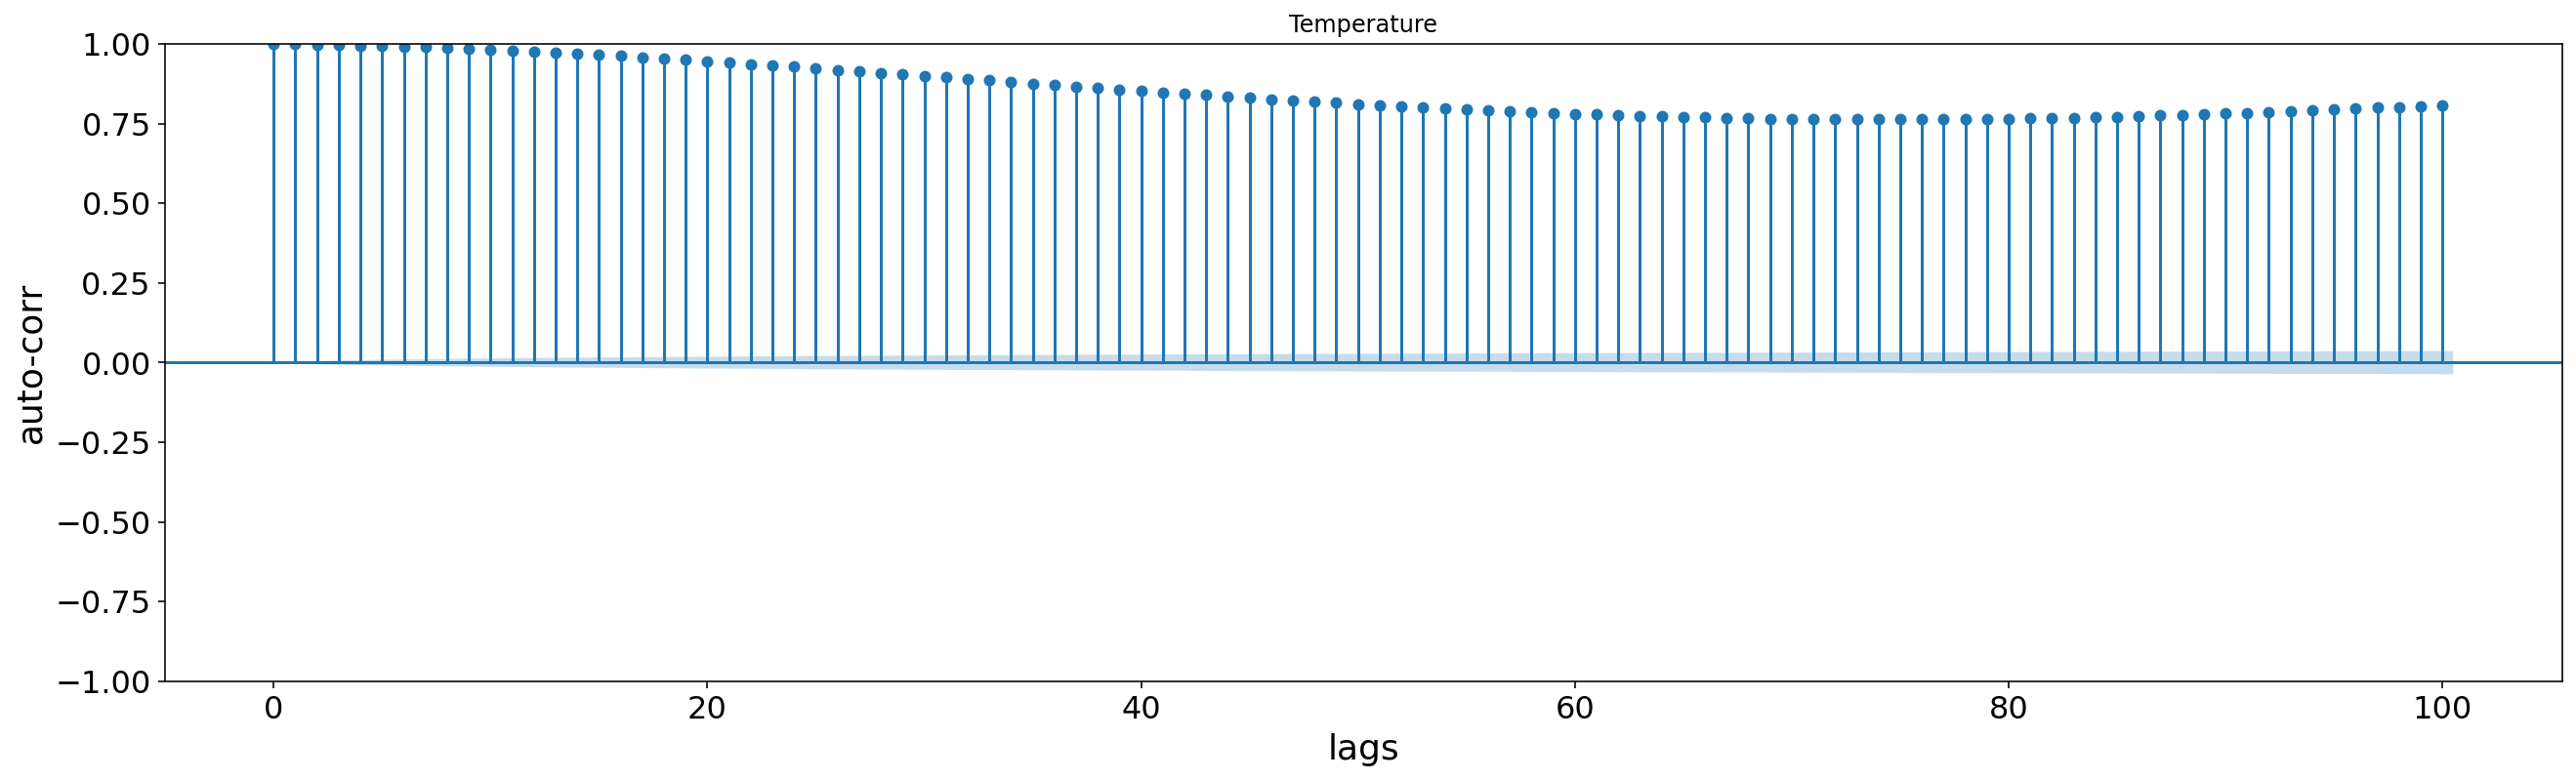

In [45]:
plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_acf(df['T (degC)'].values.squeeze(), lags=100)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("Temperature")
plt.show()

the data gradually decay which is a sign of non-stationary data. Let's use the differencing method to make data stationery.

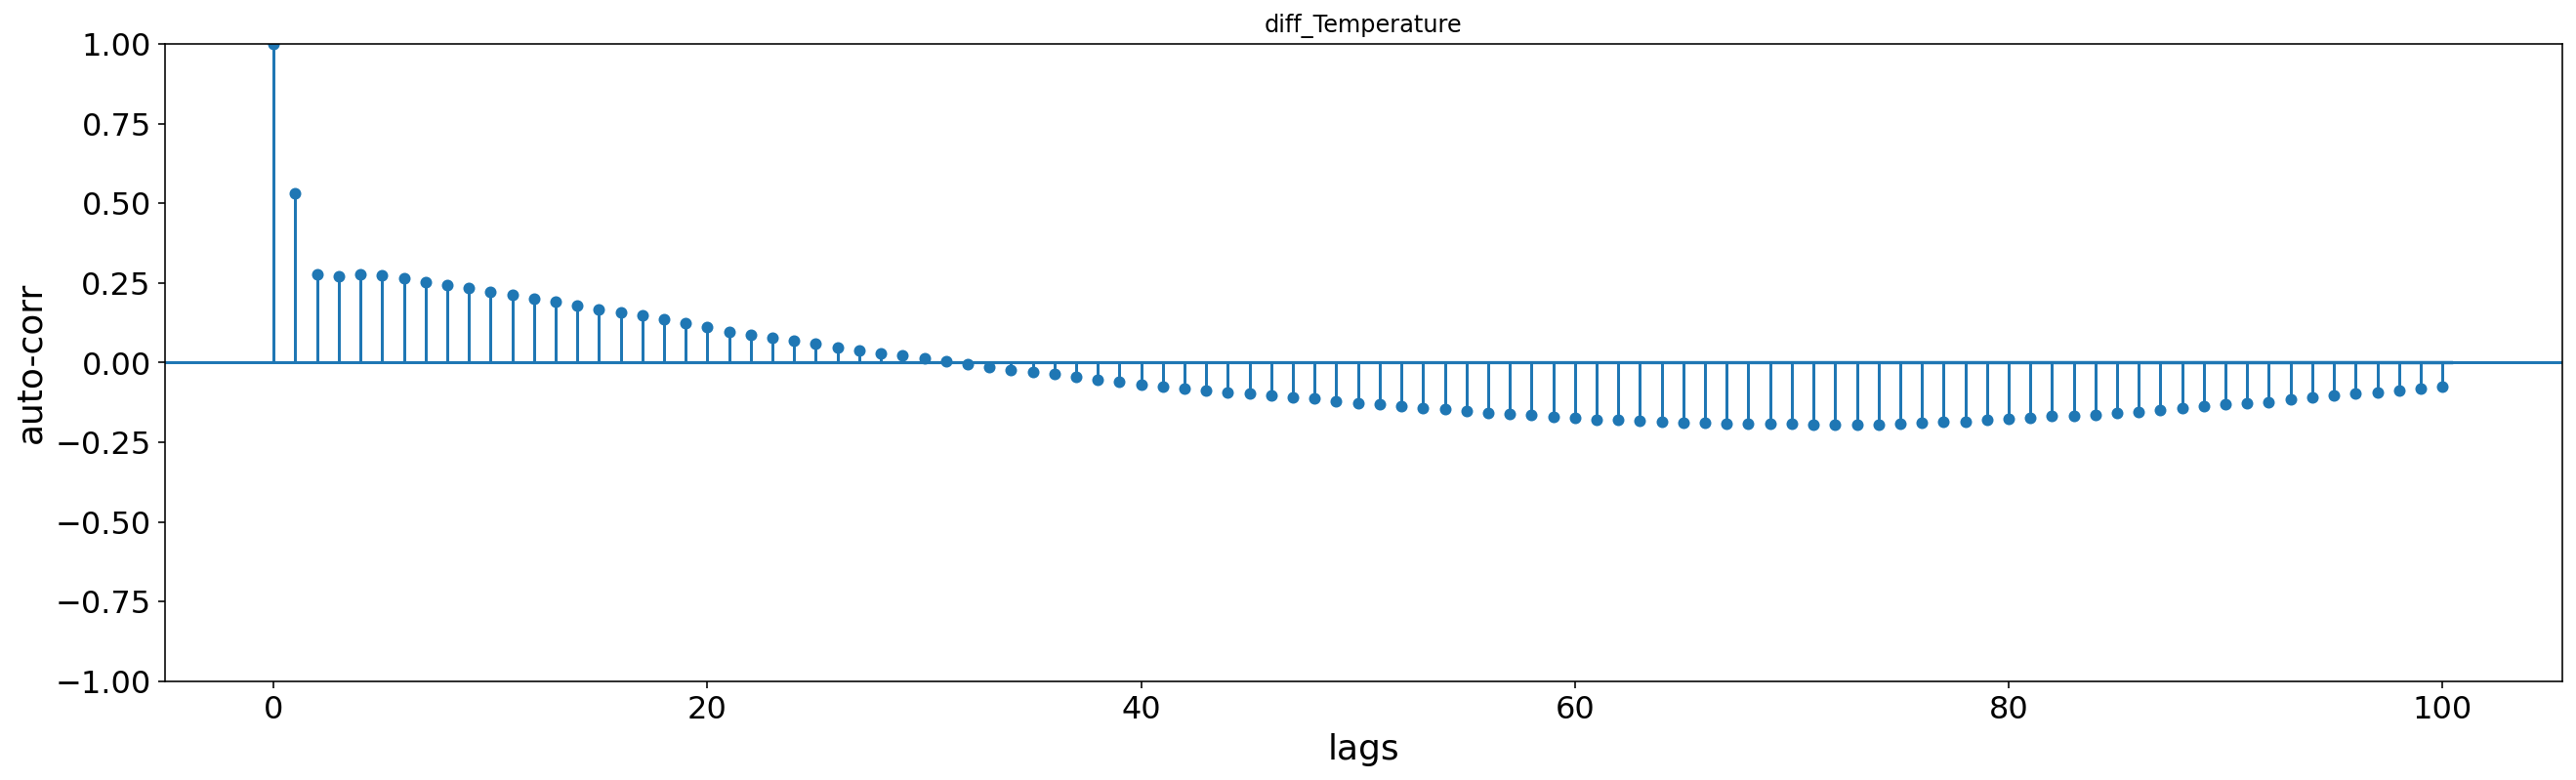

In [46]:
pri = 1
temp_diff = df['T (degC)'].diff(periods=pri)

plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_acf(temp_diff[pri:].values.squeeze(), lags=100)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("diff_Temperature")
plt.show()

it is seen that the autocorrelation decay sharply (instantly) and now data is stationary. let's take a look at the diff temperature plot.

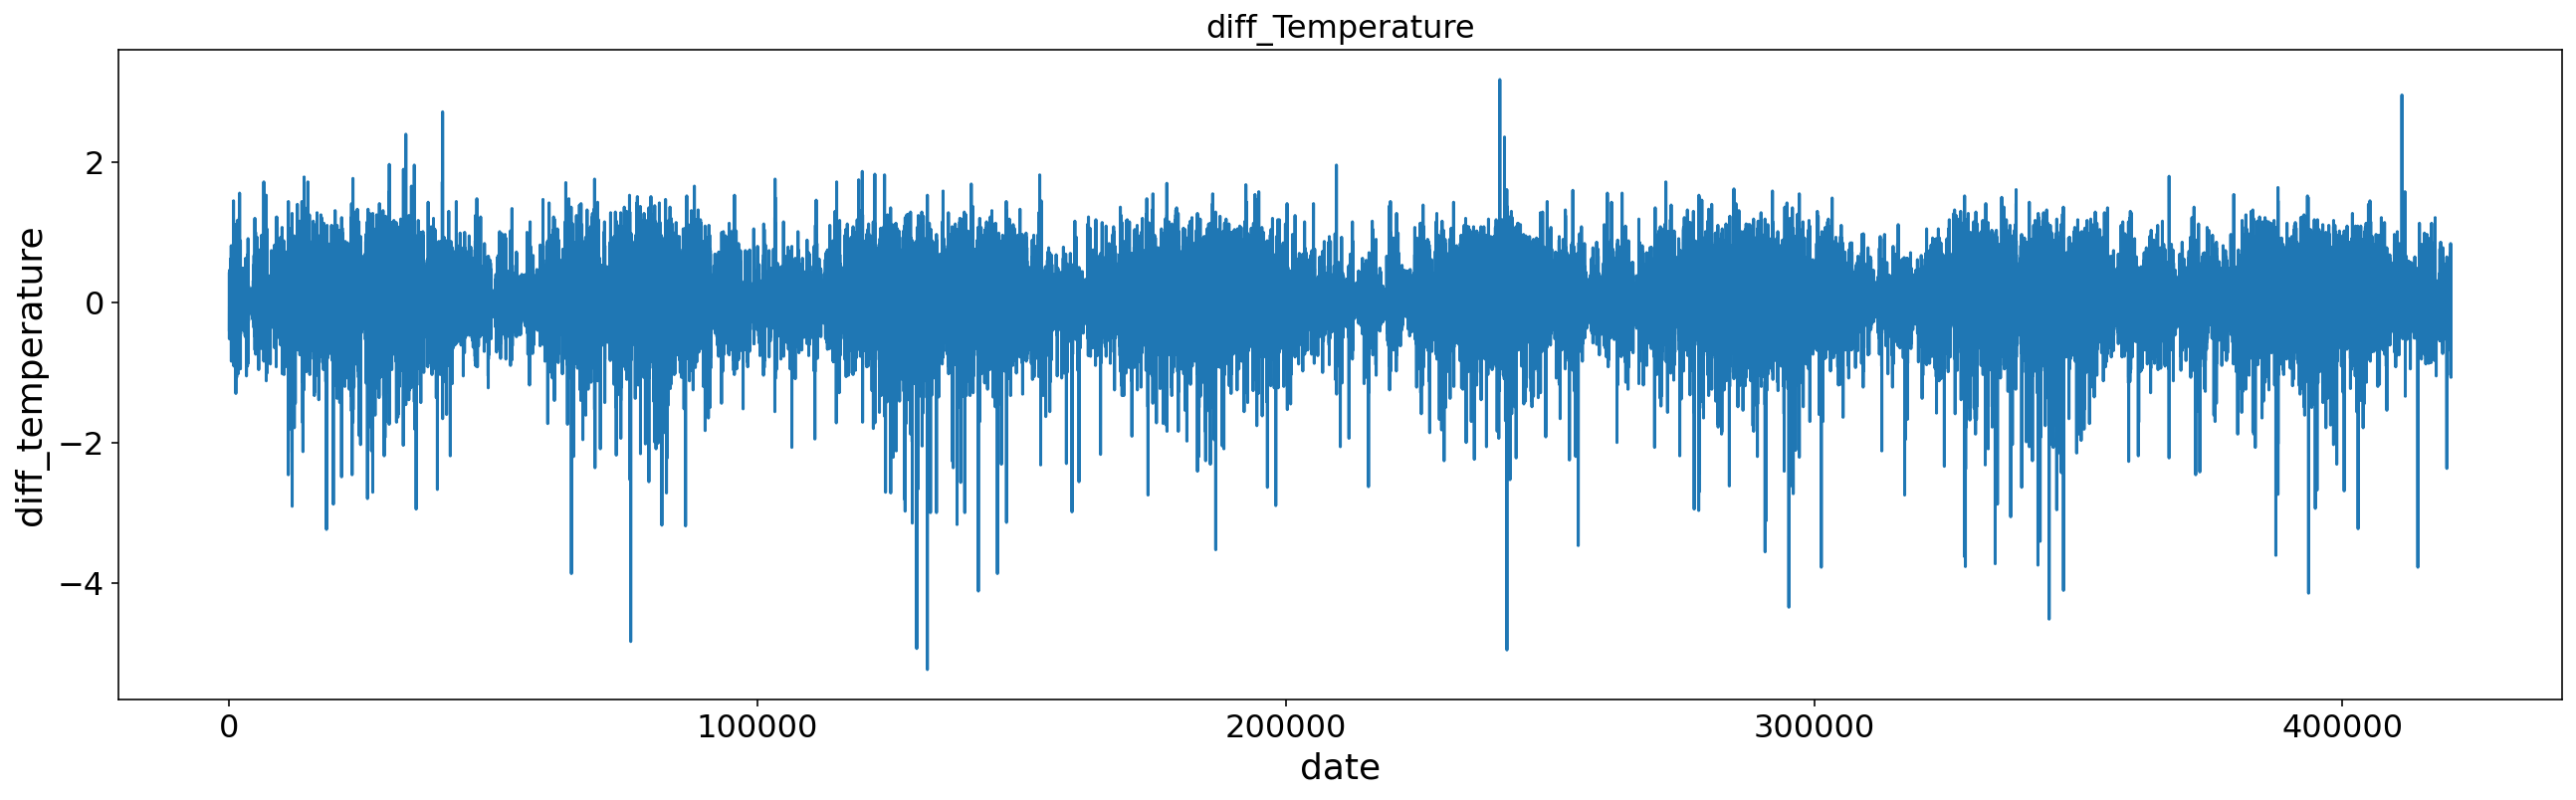

In [47]:
temp_diff.plot()
# df['T (degC)'].plot()
plt.xlabel('date', fontsize=18)
plt.ylabel('diff_temperature', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("diff_Temperature", fontsize=16)
plt.show()

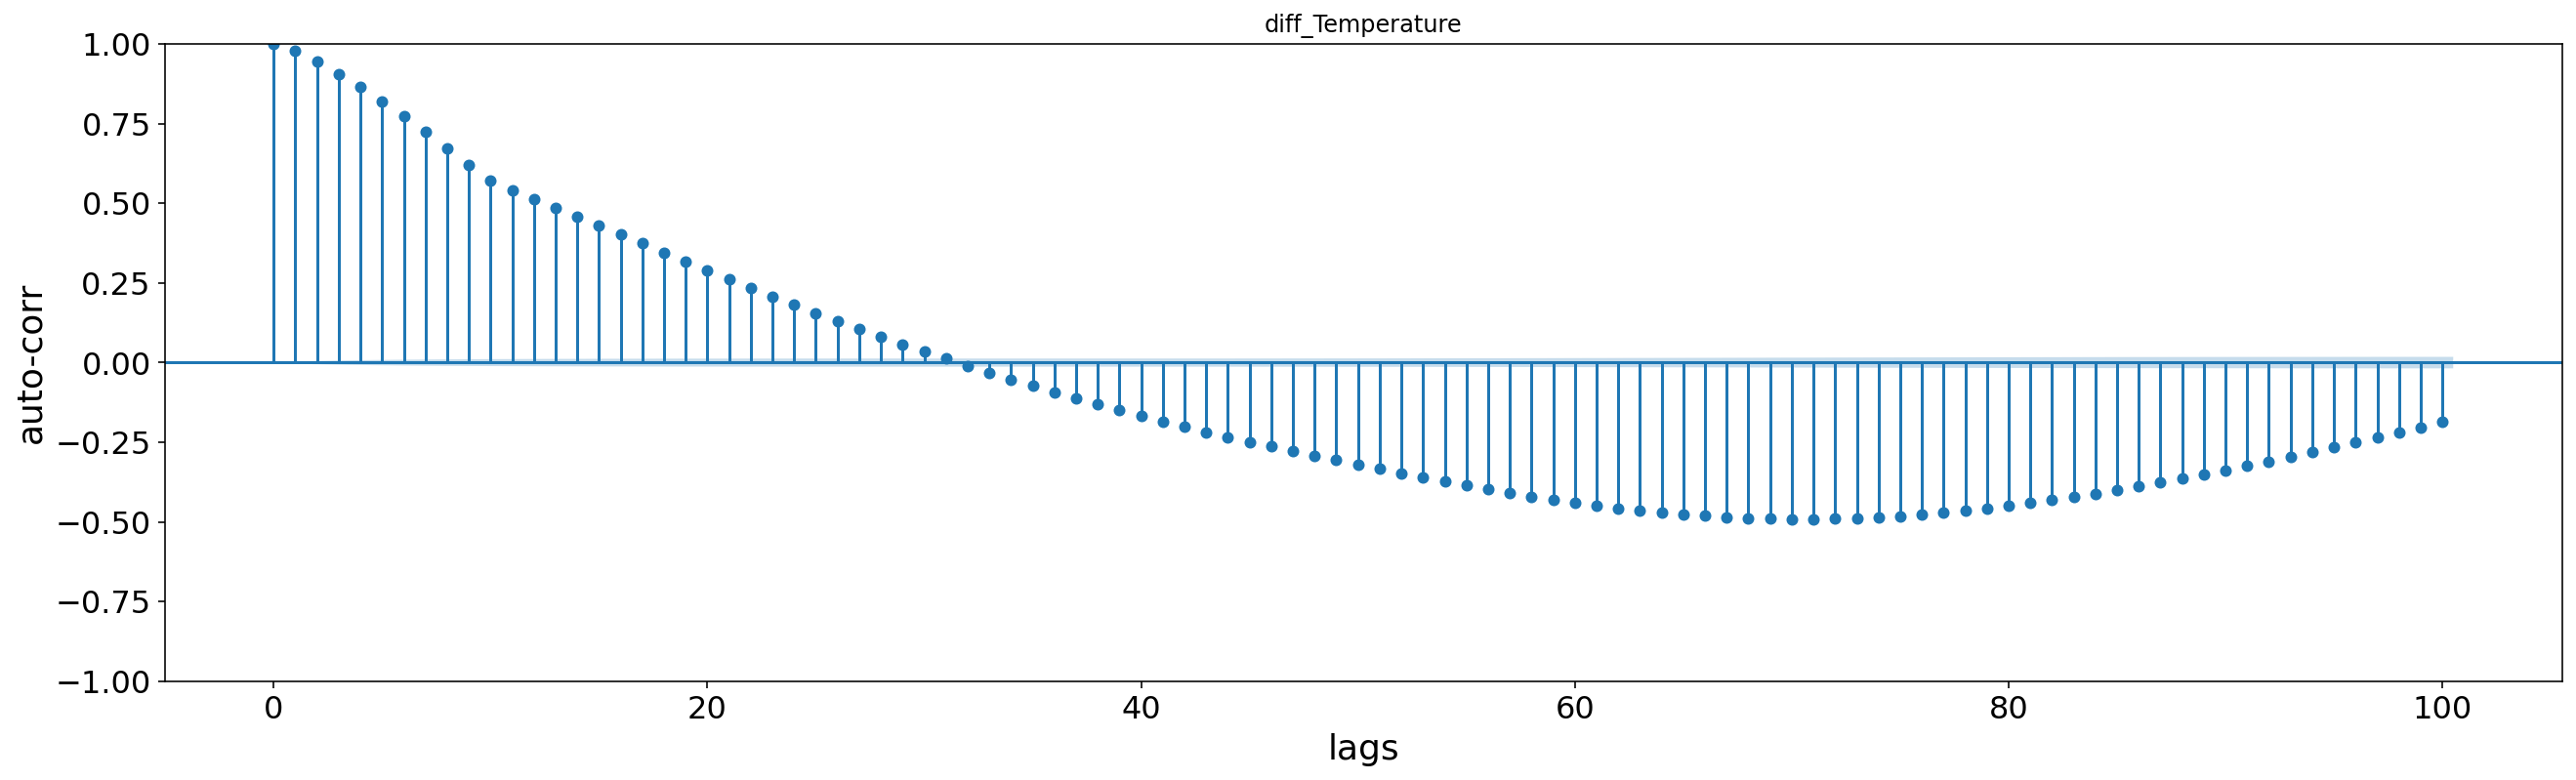

In [48]:
pri = 10
temp_diff = df['T (degC)'].diff(periods=pri)

plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_acf(temp_diff[pri:].values.squeeze(), lags=100)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("diff_Temperature")
plt.show()

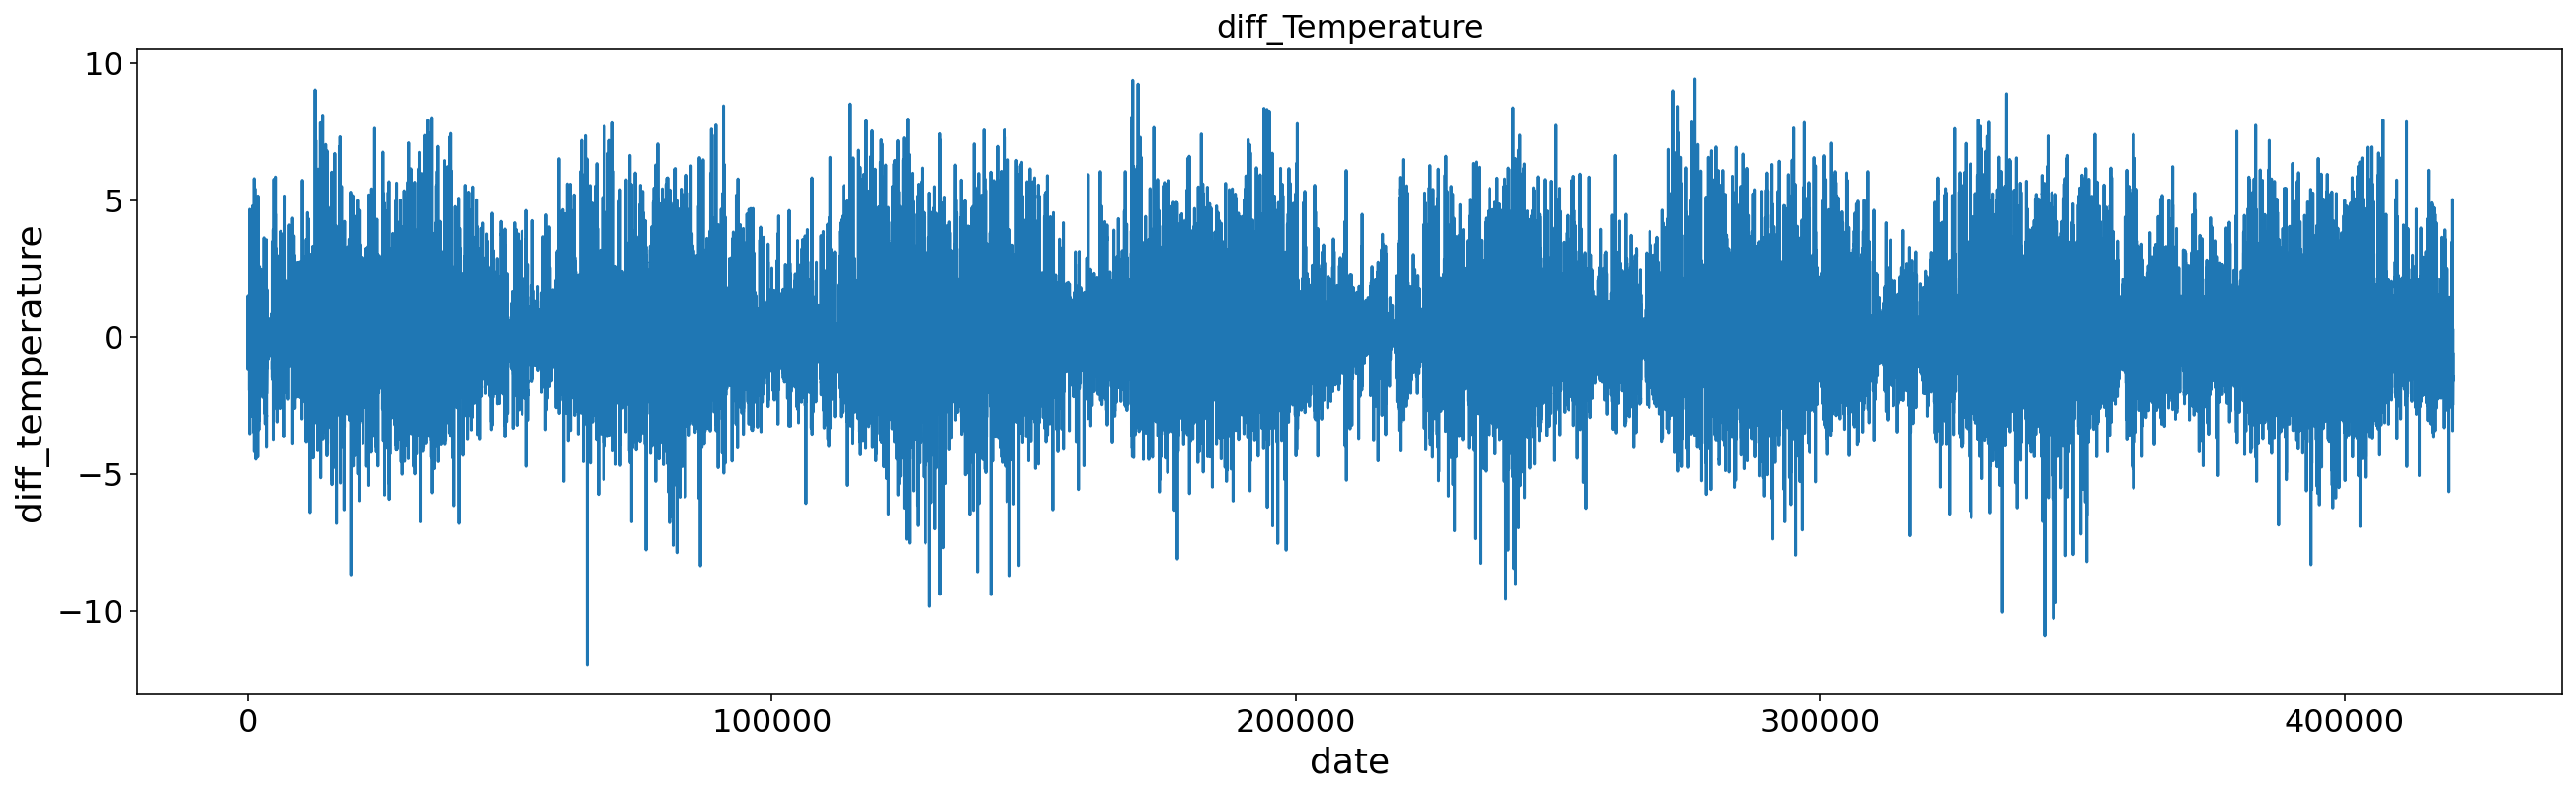

In [49]:
temp_diff.plot()
# df['T (degC)'].plot()
plt.xlabel('date', fontsize=18)
plt.ylabel('diff_temperature', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("diff_Temperature", fontsize=16)
plt.show()

the period = 1 provides the best stationary data considering the autocorrolation plots.

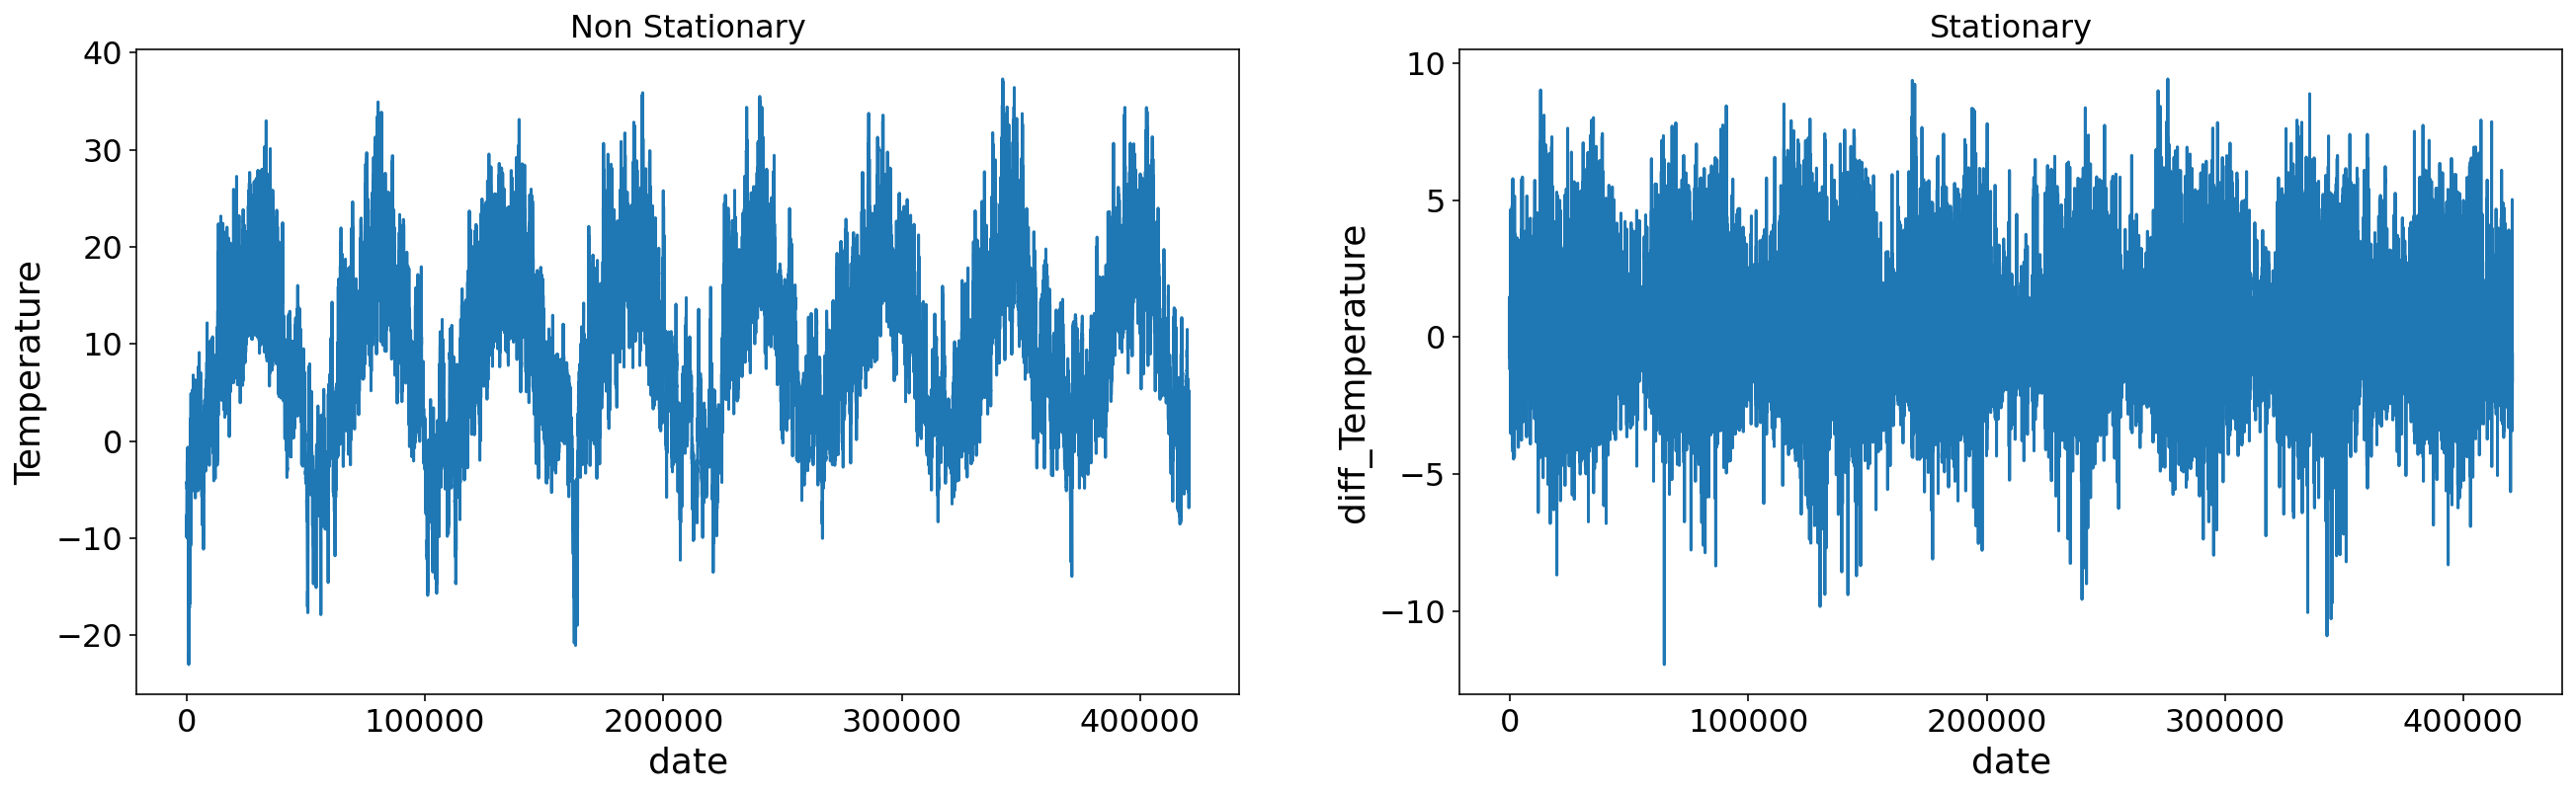

In [50]:
plt.subplot(1,2,1)
# plt.plot(temp_diff)
df['T (degC)'].plot()
# df['T (degC)'].plot()
plt.xlabel('date', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("Non Stationary", fontsize=16)


plt.subplot(1,2,2)
# plt.plot(temp_diff)
temp_diff.plot()
# df['T (degC)'].plot()
plt.xlabel('date', fontsize=18)
plt.ylabel('diff_Temperature', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("Stationary", fontsize=16)
plt.show()


plt.show()

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
# plot_acf(temp_diff[1:])
# plt.show()